# Part A 
## Name : Joel Poah
## Class: DAAA/2B/06
## Admin No: 2112729

In [16]:
# pip install tensorflow
# conda install pandas
# conda install seaborn
# conda install scikit-learn
# conda install plotly
# pip install --upgrade nbformat
# conda install Jinja2
# pip install keras-cv
# pip install tensorflow_datasets

# Deep learning classifcation on Fashion MNIST 

## Overview 
### Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
| Label       | Description |
| ----------- | ----------- |
| 0           | T-shirt/Top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle Boot  |


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,LeakyReLU
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.optimizers import SGD
import gc
import tensorflow as tf
import visualkeras
from tensorflow import keras
from sklearn.metrics import precision_score






(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)
# we have 80% train,10% test,10% validation

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)




(48000, 28, 28) (10000, 28, 28)
(48000,) (10000,)


In [18]:
X_train_df = pd.DataFrame(X_train.reshape(-1, 784))
y_train_df = pd.DataFrame(y_train)
X_train_df


0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...  223  154    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
47995    0    0    0    0    0    5    0    0    0    0  ...    0    0    0   
47996    0    0    0    0    0    1    0    0    0    0  ...   60   50    0   
47997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
47998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
47999    0    0    0    0    0    0    0    0    0   14  ...    0    0    0   

       777  778  779  780  781  782  783  
0        0    0    0    0    0    0    0  
1       69   85   19    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
47995   87  217  184    0    0    0    0  
47996    0    1    0    0    0    0    0  
47997    0    0    0    0    0    0    0  
47998    0    0    0    0    0    0    0  
47999    4  131  125   55    0    0    0  

[48000 rows x 784 columns]

## Feature wise Normalization, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)
# Pixel normalization
> Dividing each of the pixels by 255 will normalize the pixels between 0 to 1 
We normalize the pixels so that it can increase the speed of the learning process
Neural Network processes inputs uses small weights values. Large inputs can disrupt or slow down learning process.
It is good that we normalize the pixels. 

In [19]:
print(X_train.min(), X_train.max())
# it seems like the data set provided by tensorflow is already between 0 to 255 . We can normalize it by dividing by 255 or so called pixel normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0


0 255


# when splitting stratified was used
> number of data points for each class is exactly the same. This is so that there will not be biases for each class

In [20]:
types = y_train_df[0].unique()
types.sort()
print(types)
print(y_train_df[0].value_counts())
# y_ train is just an array of numbers from 0 to 9 that represent the class of the image

[0 1 2 3 4 5 6 7 8 9]
5    4800
4    4800
3    4800
7    4800
2    4800
9    4800
8    4800
0    4800
1    4800
6    4800
Name: 0, dtype: int64


In [21]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


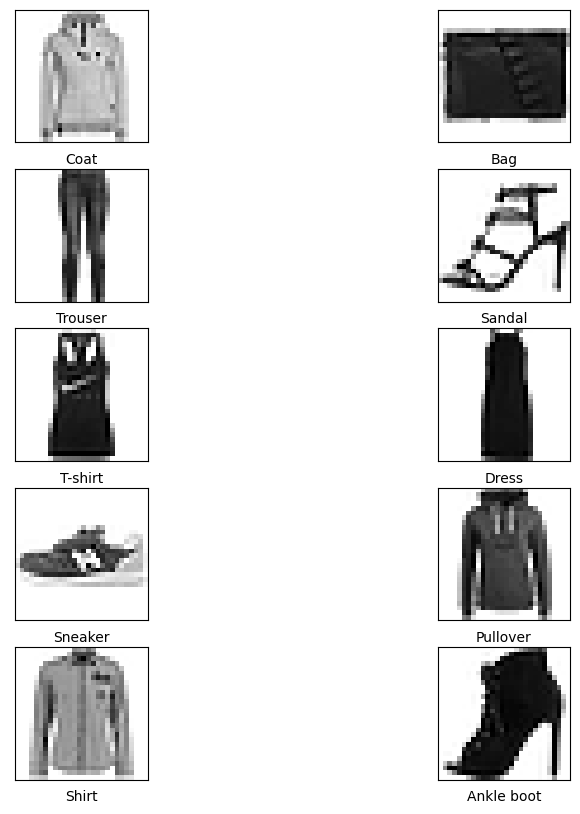

In [22]:
array_of_each_class_position = [1,21,22,20,19,2,18,6,23,11]
# plot all images in array_of_each_class_position
plt.figure(figsize=(10,10))
for i in range(len(array_of_each_class_position)):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_df.iloc[array_of_each_class_position[i]].values.reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_df.iloc[array_of_each_class_position[i]][0]])
plt.show()

In [23]:
y_test_labels = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


- X_train: uint8 NumPy array of grayscale image data with shapes (, 28, 28), containing the training data.

- y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

- X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

- y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

# Dense Neural Network / Multi layer perceptrons (MLPs) 
## MLP is a Artificial Neural Network consisting of at least 3 layers ( input , hidden layer and output) 

![](./images/DenseNN.gif) 

## **Trying out Dense neural networks** 
### 1 Layered Densely connected neural network 
- It is 1 dimensional 
- image was 28 by 28 pixels but flattened to an array of attributes (784) 
- Neural network takes in 784 columns of attributes as inputs and pass to 128 neurons in the example shown below
- Hidden layer then passes to the sigmoid function which generates a prediction percentage for the 10 classes

#### Things i discovered while experimenting with 1 layered dense neural network
- loss='sparse_categorical_crossentropy" is used for label encoded data
- will be using 'categorical_crossentropy' for one hot encoded data
- input shape of the Dense layer have to match the amount of attributes in dataset or else error thrown

In [24]:
# Train your model and save its history
def plot_loss(loss,test_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(test_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
def get_metrics(model,X_test = X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 - 4s - loss: 0.5169 - accuracy: 0.8195 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 4s - loss: 0.3931 - accuracy: 0.8573 - 4s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 4s - loss: 0.3494 - accuracy: 0.8727 - 4s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 4s - loss: 0.3211 - accuracy: 0.8824 - 4s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 4s - loss: 0.3037 - accuracy: 0.8876 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.3556 - accuracy:

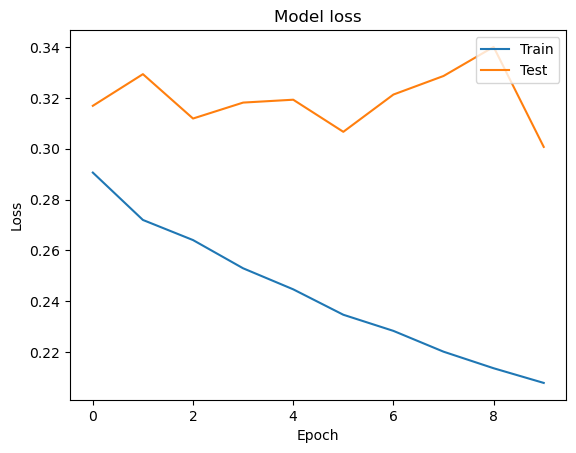

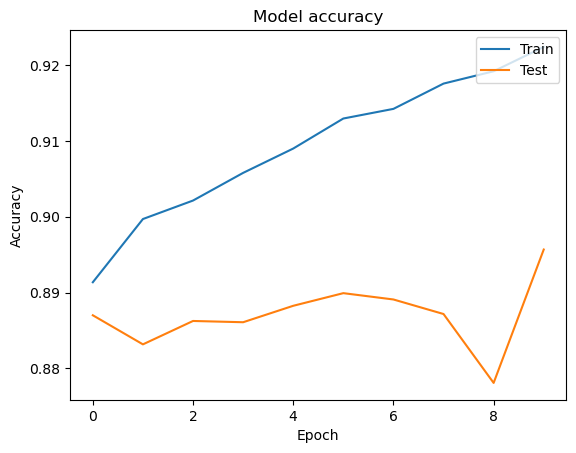

313/313 - 1s - loss: 0.3419 - accuracy: 0.8858 - 817ms/epoch - 3ms/step

Test accuracy: 0.8858000040054321
313/313 [==============================] - 1s 1ms/step


In [18]:
# Baseline simple neural network
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score,precision_score,recall_score

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

model = Sequential()




model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, verbose=2)
results=model.evaluate(X_test, y_test,verbose=2)
print("test loss,", results[0], "test acc:", results[1])


  
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# Evaluate your model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


# function to get precision, recall and f1 score

precision,recall,f1 = get_metrics(model)

# Dataframe to keep track of all model scores

Model_scores = pd.DataFrame([['Dense 1 layer NN',test_acc,test_loss,precision,recall,f1]],columns=['Model','Accuracy','Loss','Precision','Recall','F1 Score'])


# memory leak
gc.collect()
tf.keras.backend.clear_session()
del model

### 2 layer Dense Neural network
> Baseline model with at least 2 layers which performs slightly better than 1 layer
However 2 layered model is clearly overfitted where testing learning curve diverges away from training learning curve 
and only performs a little better than model with 1 layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5121 - accuracy: 0.8189 - val_loss: 0.4212 - val_accuracy: 0.8472
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3816 - accuracy: 0.8608 - val_loss: 0.3892 - val_accuracy: 0.8619
Epoch 3/5
1500/1500 [=======

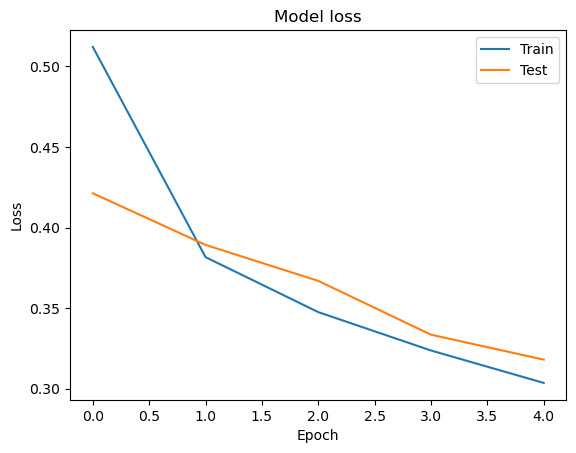

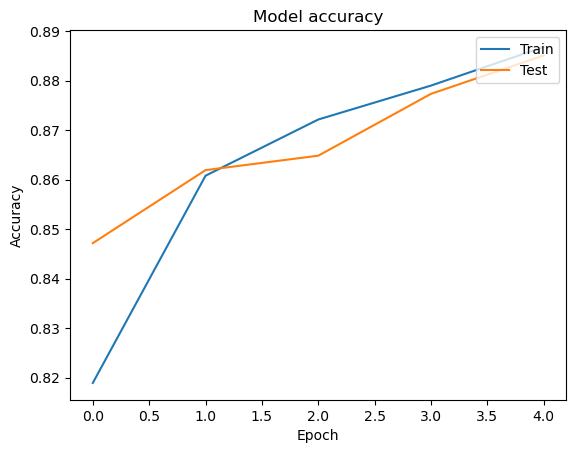

313/313 [==============================] - 0s 1ms/step


In [19]:


model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 5,
               validation_data=(X_val, y_val))

# Evaluate your model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

precision,recall,f1 = get_metrics(model)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Dense NN 2 layer',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

# memory leak
gc.collect()
tf.keras.backend.clear_session()
del model



### 3 layered MLP 
#### Backward propagation behind the scenes of a MLP Artificial Neural Network
![](./images/Backpropagation.gif)  ![](./images/GradientDescent.gif) 
- Understood why with every epoch accuracy is increased
- BackwardPropagation adjusts weights using calculas(gradient descent) finding global minimum error of the function





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5344 - accuracy: 0.8082 - val_loss: 0.4183 - val_accuracy: 0.8531
Epoch 2/10
1500/1500 [================

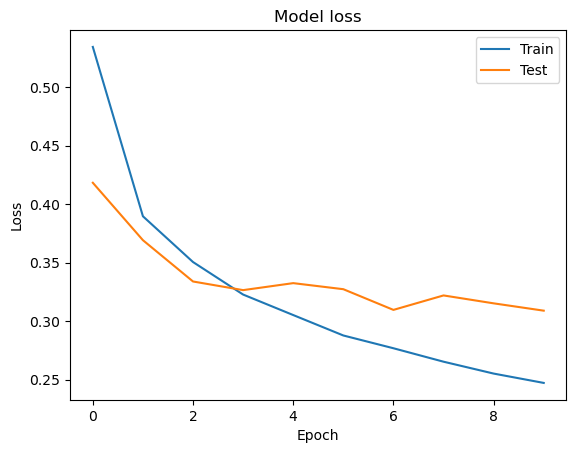

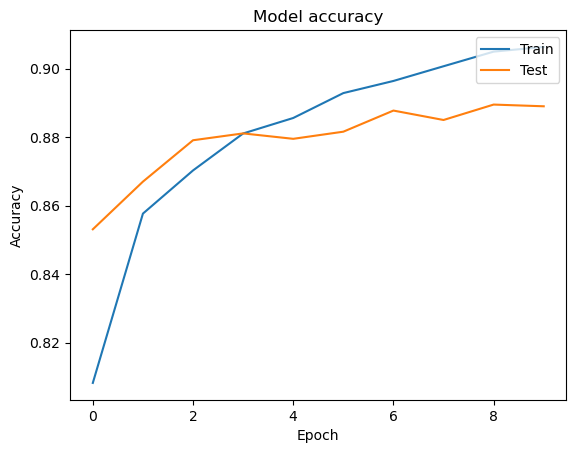

313/313 [==============================] - 0s 1ms/step


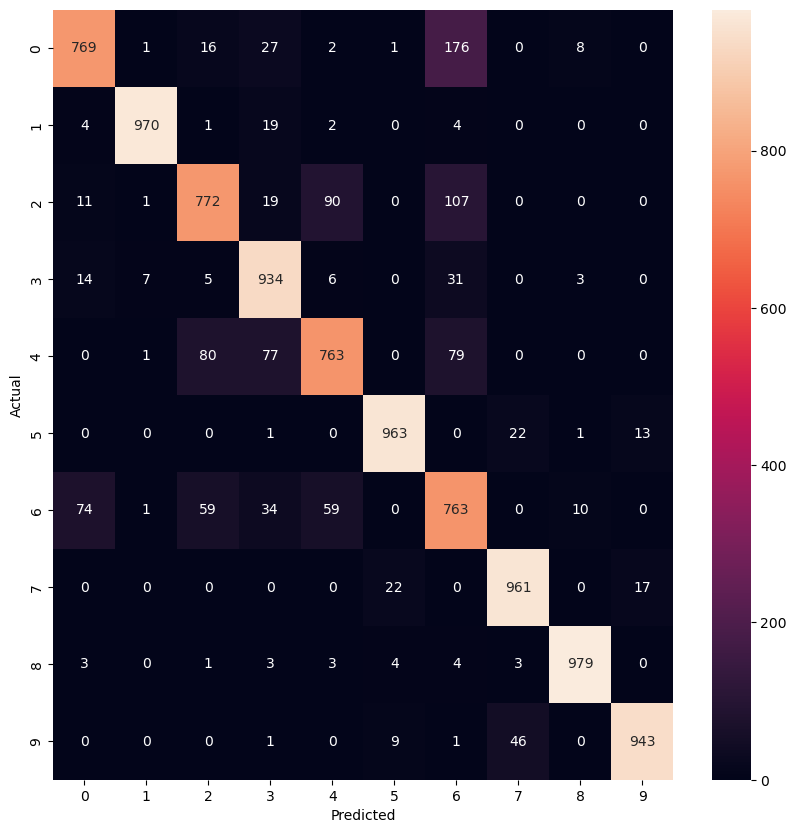

In [20]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 10,
               validation_data=(X_val, y_val))

# Evaluate your model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

precision,recall,f1 = get_metrics(model)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Dense NN 3 layer',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
classifation_matrix=confusion_matrix(y_test_labels,pred)
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# memory leak
gc.collect()
tf.keras.backend.clear_session()
del model



### Conclusion
pros
- simple model
- easier to build 

cons
- can't alter input size after model is trained
- permutation invariance , everything is fully connected as they are dense layers
- Cannot perform well on those images that have the same shape

### As shown on classification matrix , this dense neural network don't perform well on classes 9(Ankle Boots) and 7(Sneaker) and 5(Sandal)

# Convolutional Neural Network (CNN)


![](./images/IntroCNN.jpeg)

## Documentation of how Convolving or Applied Filtering works in CNN
Saily Shah — Published On January 27, 2022 and Last Modified On March 15th, 2022
Shah,S *Convolutional Neural Network: An Overview* Available at: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c[Accessed : 4 november 2022 ]
> Convolve ~ combine (one function or series) with another by forming their convolution which is also summing the element-wise product of 2 matrices (Shah,S 2022)

![](./images/convolved_z.png)
- Dot product performed between input and filter( filter is a measure of how close a region of the input resembles a feature; it can be a vertical line,horizontal edge or diagonal)
- values found in filter(2nd matrix, *filter is also known as the kernel_size in keras*) are the weights that will be learned and tuned with backpropagation( finding global minimum error of function) in the training of the network 
- sum of the product of the matrix is 70 here
> Striding convolutions : repeating what happen above but with strides; the filter moving through the image and getting a matrix of convolved features. The main purpose of doing this is to find features of a class which will then be used for classification of the images

> ![](./images/convolve.gif)
- final matrix(convolved matrix) also known as a feature map produced is smaller after retrieving main features of an image







## Why do we need Flattening
- Pooled feature maps are 2 Dimensional arrays 
- Usually Dense layers are used at the last part of CNNs which requires flatten or else there will be an error
- convert data into a 1 dimensional array in order to pass to the fully connected layer using Flatten
- Flatten is required unless last layer uses global max pooling

## General conclusion on Convolving 
> Convolving helps neural network extract features performing better than MLP. 



In [21]:
# Functions for plotting
from plotly.subplots import make_subplots
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

## CNN (stupid baseline)


In [26]:
# function to get precision, recall and f1 score
def get_metrics(model,X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1
print('before',X_train.shape,X_test.shape)
print('before',y_train.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
print('after',X_train.shape,X_test.shape)


before (48000, 784) (10000, 784)
before (48000, 10) (10000, 10)
after (48000, 28, 28, 1) (10000, 28, 28, 1)


In [23]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
seed = np.random.seed(1)








fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Evaluate your model on the test set
test_loss, test_acc = fashion_model.evaluate(X_test, y_test, verbose=2)

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)




# Dataframe to keep track of all model scores
precision,recall,f1 = get_metrics(fashion_model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN linear activation',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)






before (48000, 784) (10000, 784)
before (48000, 10) (10000, 10)
after (48000, 28, 28, 1) (10000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
____

313/313 [==============================] - 1s 2ms/step


conv2d (3, 3, 1, 32)


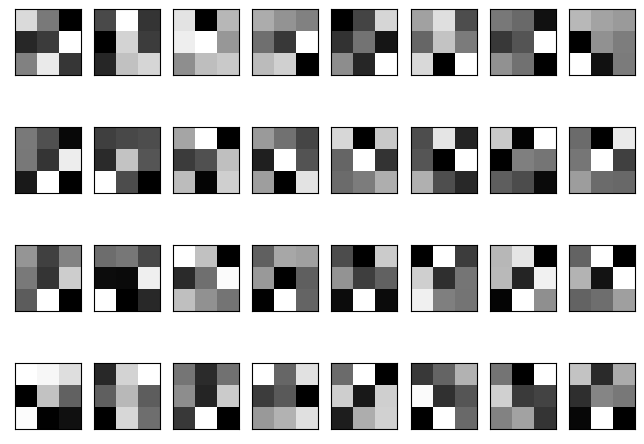

313/313 [==============================] - 1s 2ms/step


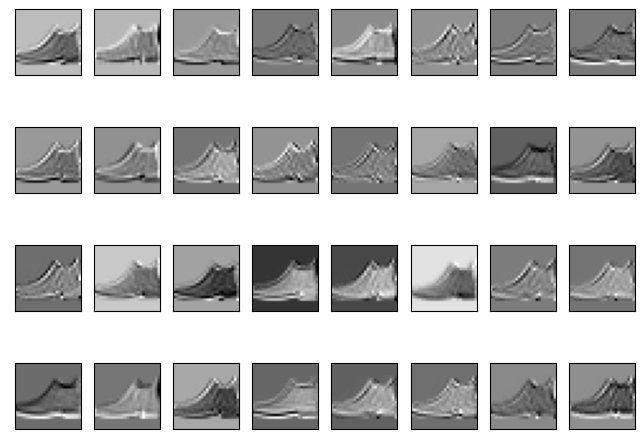

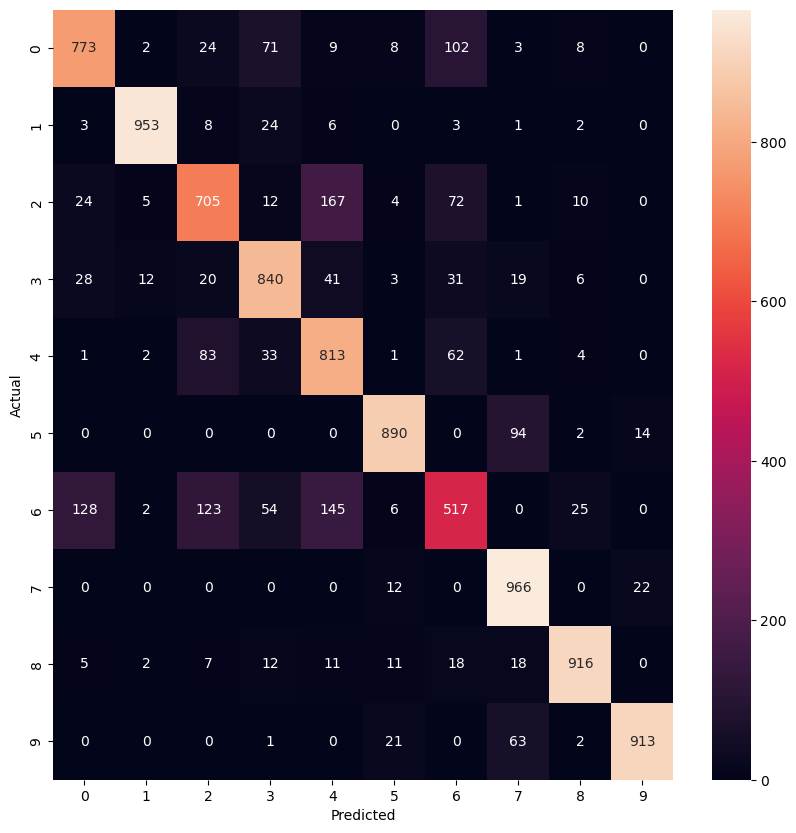

In [24]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = fashion_model.layers #Conv layers at 0, 
filters, biases = fashion_model.layers[0].get_weights()
print(layer[0].name, filters.shape)

# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()


# plot feature maps after first convolutional layer
from keras.models import Model
layer = fashion_model.layers[0]
intermediate_model = Model(inputs=fashion_model.input, outputs=layer.output)
intermediate_output = intermediate_model.predict(X_test)
plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer
for i in range(1, n_filters + 1):
    f = intermediate_output[0, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f, cmap='gray')
    


pred=fashion_model.predict(X_test)
pred=np.argmax(pred,axis=1)
classifation_matrix=confusion_matrix(y_test_labels,pred)
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# memory leak
# gc.collect()
# tf.keras.backend.clear_session()
# del fashion_model

### Results was a lot better as compared to the previous multilayer perceptron neural network
- There wasn't as much confusion between class 5 , 7 and 8 
### However we can still improve the model in predicting classes 2(pullover) , 4(Coat) and 6(Shirt) . Model also thinks that class 6(shirt) may be a class 0(T-shirt) occasionally it looks like the model may be confused because of the shape of the image 

### Conclusion on trying out my very first CNN 
- to_categorical is important 
>  Machines understand binary and it makes more sense to one_hot_encode to change it to an array of 0 and 1s instead of a range of 0 to 9
- even with linear activations, we can already get high accuracy scores with CNN
- Understood filters, kernel_size ,stridings and why there is a flatten layer as well
> Its amazing how the filter is extracting key information on the various classes, showing the lines edge and features of the images it is looking out for

### To carry out more test on the various parameters of CNNs I will need cross validation
- helps get better accuracy and average scores when comparing models
- Provides Median and standard deviation of models 
- using 50 epochs but with early stopping patience of 5

In [25]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		h_callback = EarlyStopping(monitor='val_loss', patience=5)
		# fit model
		history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback]) 
		# evaluate model
		_, acc = model.evaluate(valX, valy, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
	# evaluate model
	scores, histories= evaluate_model(model,X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

	del model
	gc.collect()
	tf.keras.backend.clear_session()

	




## Understanding difference between loss and accuracy
![](./images/loss_accuracy.png)
### Before we continue we need to understand how we can choose the better model
#### Accuracy
- Percentage to measure classification model performance

#### Lost or Cost function
- not percentage but summation of errors made for each sample
- probabilities or uncertainty of a prediction (how much the prediction varies from true value)
> Softmax produces a probability score for all 10 classes . If the model is not too confident about the choice it makes , it will be summed up and added to logloss. The more uncertain the model is the higher the logloss

## Pooling in CNN
### Documentation of how Pooling works in CNN
![](./images/Pooling.gif)
- Reducing spatial size this helps *reduce computational power to process data* (also known as dimensionality reduction)
- Helps in retrieving dominant features
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

> My hypothesis is that max pooling will be better for this dataset as it completely wipes out noise in a region by taking brightest

> 88.633
> 88.600
> 89.317
> 88.558
> 89.183


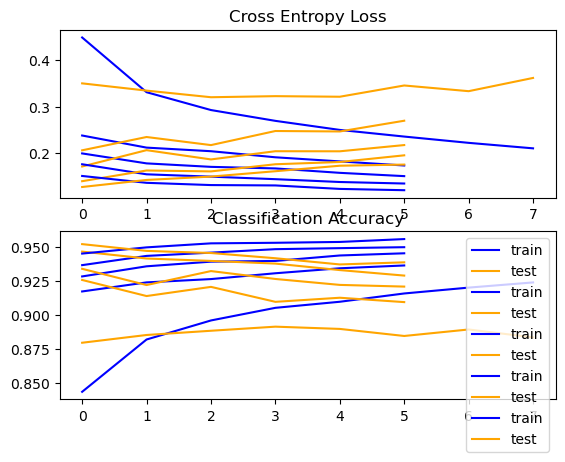

Accuracy: mean=88.858 std=0.323, n=5


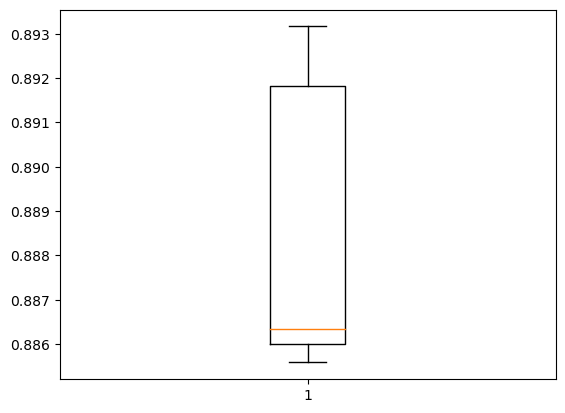

313/313 - 1s - loss: 0.7527 - accuracy: 0.8741 - 900ms/epoch - 3ms/step
313/313 [==============================] - 1s 2ms/step


In [26]:
def model_max_pooling():
    # define model
    max_pool_model = Sequential()
    max_pool_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
    max_pool_model.add(MaxPooling2D((2, 2)))
    max_pool_model.add(Flatten())
    max_pool_model.add(Dense(128, activation='linear'))
    max_pool_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    max_pool_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return max_pool_model

run_test_harness(model_max_pooling(),X_train, y_train)

model_max_pooling = model_max_pooling()
model_max_pooling.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# Evaluate your model on the test set
test_loss, test_acc = model_max_pooling.evaluate(X_test, y_test, verbose=2)

precision,recall,f1 = get_metrics(model_max_pooling,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN linear max pool',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

> 83.958
> 84.517
> 84.858
> 84.825
> 84.967


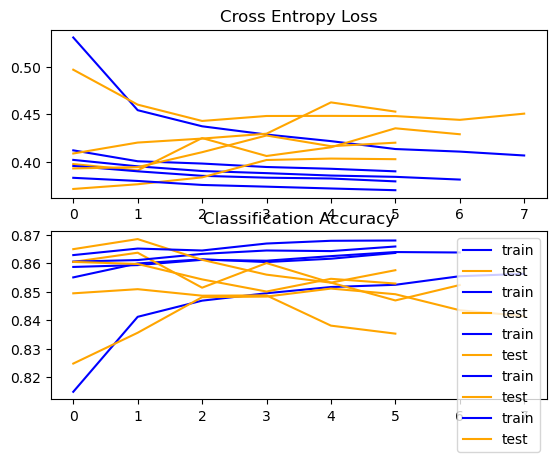

Accuracy: mean=84.625 std=0.365, n=5


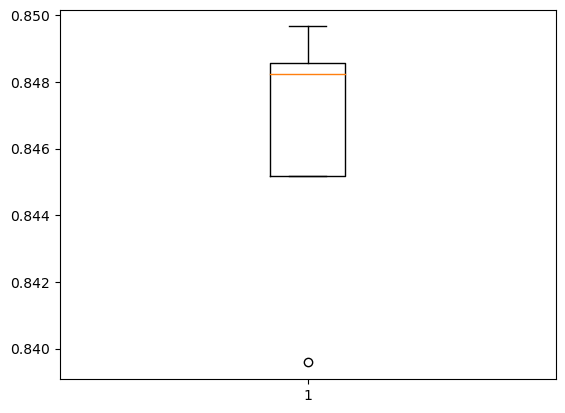

313/313 - 1s - loss: 0.4953 - accuracy: 0.8292 - 680ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step


In [27]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    average_pool_model = Sequential()
    average_pool_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
    average_pool_model.add(AveragePooling2D((2, 2)))
    average_pool_model.add(Flatten())
    average_pool_model.add(Dense(128, activation='linear'))
    average_pool_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    average_pool_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return average_pool_model

run_test_harness(model_average_pooling(),X_train, y_train)

model_average_pooling = model_average_pooling()
model_average_pooling.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# Evaluate your model on the test set
test_loss, test_acc = model_average_pooling.evaluate(X_test, y_test, verbose=2)

precision,recall,f1 = get_metrics(model_average_pooling,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN linear avg pool',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


### Added batch sizing to see if it affects

In [28]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model_batch.fit(X_train, y_train, epochs = 10, batch_size=32,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4718720   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [======================

CPU times: total: 1min 30s
Wall time: 1min 8s


In [29]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model_batch.fit(X_train, y_train, epochs = 10, batch_size=64,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4718720   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [========================

CPU times: total: 50.4 s
Wall time: 37.2 s


In [30]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model_batch.fit(X_train, y_train, epochs = 10, batch_size=128,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 36864)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4718720   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 [========================

CPU times: total: 31.3 s
Wall time: 23.8 s


#### Batch sizing does improve performance slightly 
>The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. Instead of having to update only after the whole dataset is trained once. It is indeed better to update after training each batch.
##### *smaller batch_size is will take more time though*

- Added batch size of 128 to function as there will be alot of epochs and it will take a long time to train

In [31]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5, valX=X_val, valY=y_val):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=100, batch_size=128,validation_data=(testX, testY), verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
		# evaluate model
		_, acc = model.evaluate(valX, valY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
	

	

# Batch normalization
x* = (x - E[x]) / sqrt(var(x)) where x * is new value of a single component E[x] is mean in a batch var(x) is variance of x in a batch 


## Theoretical
- Covariate shift is a change in the distribution of the input variables and also hidden inputs in the layers (Andrew,ng 2017) , layer 1 may have a different distribution than layer 2 and affect subsequent layers
> Covariate shift is not good because if the distribution keeps changing then them model will forever be trying to chase after a moving target of finding the best weights. Batch normalization helps to reduce the effect of covariate shift by normalizing the inputs to each layer and making the distribution of the inputs to each layer more stable well although recently there are arguments about this theory but scholars still agree on how the loss function is smoothened out and the model is able to converge faster generally.


## Practical 
- Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch.
- It has been shown to accelerate the training of deep networks by reducing the number of training epochs required to train deep networks.
- It has also been shown to be effective at reducing overfitting in deep networks or a regularizing effect


In [32]:
%%time
from keras.layers import BatchNormalization
fashion_model_batchnorm = Sequential()
fashion_model_batchnorm.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))

fashion_model_batchnorm.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batchnorm.add(BatchNormalization())
fashion_model_batchnorm.add(Flatten())
fashion_model_batchnorm.add(Dense(128, activation='linear'))
fashion_model_batchnorm.add(Dense(num_classes, activation='softmax'))
fashion_model_batchnorm.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batchnorm.summary()

h_callback = fashion_model_batchnorm.fit(X_train, y_train, epochs = 10, batch_size=64,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)




test_loss, test_acc = fashion_model_batchnorm.evaluate(X_test, y_test, verbose=2)

precision,recall,f1 = get_metrics(fashion_model_batchnorm,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN linear w batch_norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

gc.collect()
tf.keras.backend.clear_session()
del fashion_model_batchnorm

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 flatten_4 (Flatten)         (None, 36864)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               4718720   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

313/313 - 1s - loss: 0.5129 - accuracy: 0.8180 - 708ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step
CPU times: total: 58.3 s
Wall time: 44 s


## Accuracy of with batch normalization may not be as high 
> Since it regularized on an underfitted model I did not expect it to perform as well as the model without batch normalization. Lets then try it on a deeper network!

Epoch 1/200
375/375 [==============================] - 4s 8ms/step - loss: 1.3415 - accuracy: 0.7450 - val_loss: 0.7197 - val_accuracy: 0.8312
Epoch 2/200
375/375 [==============================] - 3s 7ms/step - loss: 0.6421 - accuracy: 0.8377 - val_loss: 0.4994 - val_accuracy: 0.8710
Epoch 3/200
375/375 [==============================] - 3s 7ms/step - loss: 0.5336 - accuracy: 0.8580 - val_loss: 0.4145 - val_accuracy: 0.8907
Epoch 4/200
375/375 [==============================] - 3s 7ms/step - loss: 0.4800 - accuracy: 0.8721 - val_loss: 0.3859 - val_accuracy: 0.8985
Epoch 5/200
375/375 [==============================] - 3s 7ms/step - loss: 0.4428 - accuracy: 0.8796 - val_loss: 0.3783 - val_accuracy: 0.8927
Epoch 6/200
375/375 [==============================] - 3s 7ms/step - loss: 0.4158 - accuracy: 0.8860 - val_loss: 0.3385 - val_accuracy: 0.9080
Epoch 7/200
375/375 [==============================] - 3s 7ms/step - loss: 0.3996 - accuracy: 0.8895 - val_loss: 0.3581 - val_accuracy: 0.8986

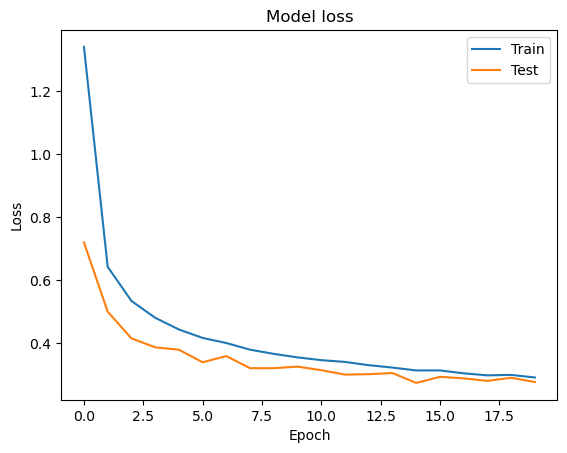

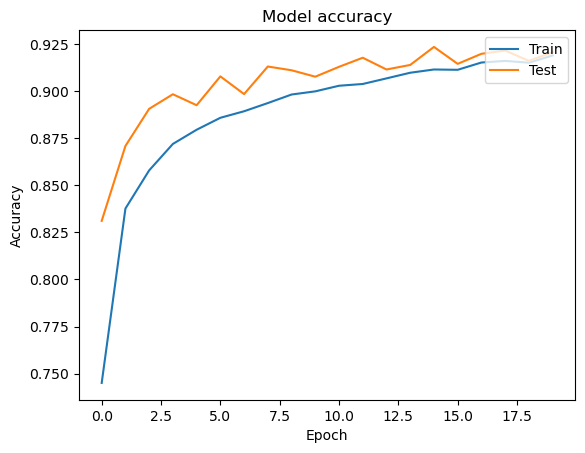

313/313 - 1s - loss: 0.2965 - accuracy: 0.9138 - 843ms/epoch - 3ms/step
313/313 [==============================] - 1s 2ms/step


In [33]:
import tensorflow
deeper_batchnorm_model = Sequential()
deeper_batchnorm_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
deeper_batchnorm_model.add(MaxPooling2D((2, 2)))
deeper_batchnorm_model.add(BatchNormalization())
deeper_batchnorm_model.add(Dropout(0.25))
deeper_batchnorm_model.add(Conv2D(64, (5, 5), activation='relu'))
deeper_batchnorm_model.add(BatchNormalization())
deeper_batchnorm_model.add(MaxPooling2D(pool_size=(3, 3)))
deeper_batchnorm_model.add(Dropout(0.25))
deeper_batchnorm_model.add(Conv2D(128, (3, 3), activation='relu'))
deeper_batchnorm_model.add(BatchNormalization())
deeper_batchnorm_model.add(Dropout(0.4))
deeper_batchnorm_model.add(Flatten())
deeper_batchnorm_model.add(Dense(128, activation='relu'))
deeper_batchnorm_model.add(Dropout(0.3))
deeper_batchnorm_model.add(Flatten())
deeper_batchnorm_model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(0.01)))

deeper_batchnorm_model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


h_callback = deeper_batchnorm_model.fit(X_train, y_train, epochs = 200,
                validation_data=(X_val, y_val), callbacks=[early_stopping] , batch_size=128)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

test_loss, test_acc = deeper_batchnorm_model.evaluate(X_test, y_test, verbose=2)
precision,recall,f1 = get_metrics(deeper_batchnorm_model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Deeper CNN w batch_norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

gc.collect()
tf.keras.backend.clear_session()
del deeper_batchnorm_model



## What I learned
- Batch normalization worked better in deeper neural networks , tried it on a shallow CNN and it did not really help with performance 
- Helps with covariate shift theoretically ( although recently scholars have argued over this )
- Generally smoothens the loss function and helps with gradient descent ( at least something generally scholars agree on )

# Handling Representation Scarcity
# Data augmentation generates more data by applying the features below to the dataset
## i will only apply this features as I think they will help the model 
- Rotation
- Shift
- Flip

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)
before (48000, 28, 28) (10000, 28, 28)
before (48000,) (10000,)


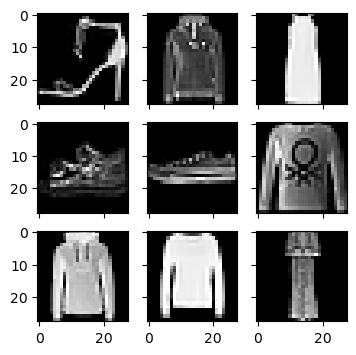

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4718720   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

KeyboardInterrupt: 

In [7]:
%%time

## Importing data and augmenting it
import keras 
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)


print(X_train.shape, X_val.shape, X_test.shape)


X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
print('before',X_train.shape,X_test.shape)
print('before',y_train.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
#  create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

from keras.layers import BatchNormalization
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))

fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(BatchNormalization())
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(10, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
h_callback = fashion_model_batch.fit(X_train, y_train, epochs = 100, batch_size=128,validation_data=(X_val, y_val),callbacks=[early_stopping])


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)
# evaluate on test set
score = fashion_model_batch.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

precision,recall,f1 = get_metrics(fashion_model_batch,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['linear batchnorm high epochs w rotated data aug',score[1],score[0],precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

visualkeras.layered_view(fashion_model_batch)

del fashion_model_batch
gc.collect()
tf.keras.backend.clear_session()


## Rotating

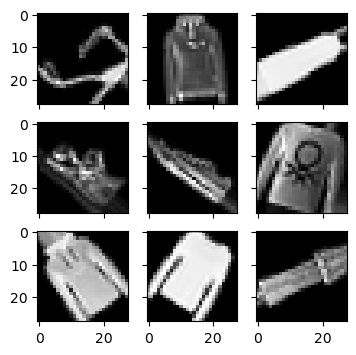

after (48000, 28, 28, 1) (10000, 28, 28, 1)
after (48000, 10) (10000, 10)


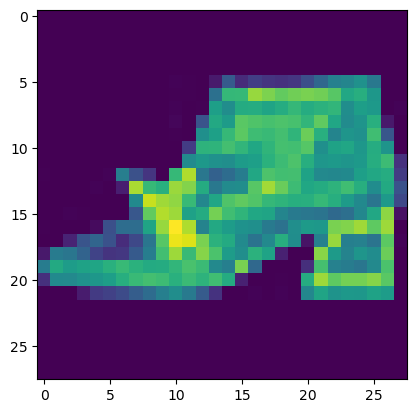

In [8]:
X_train_rotate = X_train.copy()
y_train_rotate = y_train.copy()

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train_rotate)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_rotate, y_train_rotate, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

X_train_rotated = datagen.flow(X_train_rotate, y_train_rotate, batch_size=X_train_rotate.shape[0], shuffle=False).next()
X_train_rotated = X_train_rotated[0]

# merge rotated data with original
X_train_rot = np.concatenate((X_train,X_train_rotated),axis=0)
y_train_rot = np.concatenate((y_train,y_train_rotate),axis=0)
print('after',X_train.shape,X_test.shape)
print('after',y_train.shape,y_test.shape)

plt.imshow(X_train_rot[12])
plt.show()


## Shifting

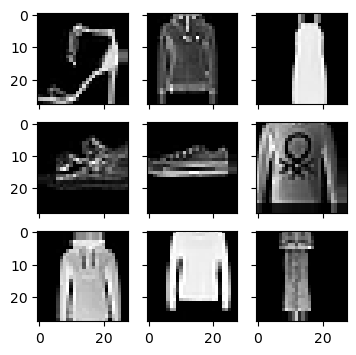

after (48000, 28, 28, 1) (10000, 28, 28, 1)
after (48000, 10) (10000, 10)


In [9]:
X_train_shift = X_train.copy()
y_train_shift = y_train.copy()

# define data preparation
datagen = ImageDataGenerator(width_shift_range=[-2,2], height_shift_range=[-2,2])
# fit parameters from data
datagen.fit(X_train_shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_shift, y_train_shift, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

X_train_shifted = datagen.flow(X_train_shift, y_train_shift, batch_size=X_train_shift.shape[0], shuffle=False).next()
X_train_shifted = X_train_shifted[0]


# merge rotated data with original
X_train_shif = np.concatenate((X_train,X_train_shifted),axis=0)
y_train_shif = np.concatenate((y_train,y_train_shift),axis=0)
print('after',X_train.shape,X_test.shape)
print('after',y_train.shape,y_test.shape)




## Flipping 

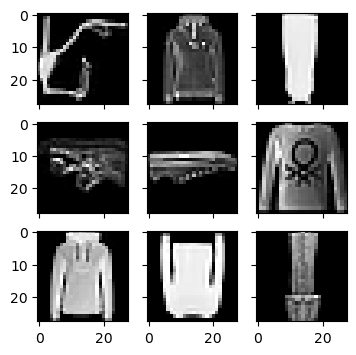

after (48000, 28, 28, 1) (10000, 28, 28, 1)
after (48000, 10) (10000, 10)


In [10]:
X_train_flip = X_train.copy()
y_train_flip = y_train.copy()

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train_flip)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_flip, y_train_flip, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break


X_train_flipped = datagen.flow(X_train_flip, y_train_flip, batch_size=X_train_flip.shape[0], shuffle=False).next()
X_train_flipped = X_train_flipped[0]

# merge flipped data with original
X_train_flips = np.concatenate((X_train,X_train_flipped),axis=0)
y_train_flips = np.concatenate((y_train,y_train_flip),axis=0)
print('after',X_train.shape,X_test.shape)
print('after',y_train.shape,y_test.shape)





In [38]:
# concat flip shift and rotate
X_train = np.concatenate((X_train,X_train_shifted,X_train_rotated),axis=0)
y_train = np.concatenate((y_train,y_train_shift,y_train_rotate),axis=0)
print('total data points after adding all:',X_train.shape,X_test.shape)

total data points after adding all: (144000, 28, 28, 1) (10000, 28, 28, 1)




## Trying out different activations (linear probably wasn't the best)
![](./images/activations.png) 

> We had to introduce some non-linearity into the model. Images probably won't only have linear relations and the model needs a way to find these relations, simply put non-linear problems require non-linear solutions. 

#### Trying out relu

> 88.950
> 89.308
> 88.875
> 88.242
> 88.350


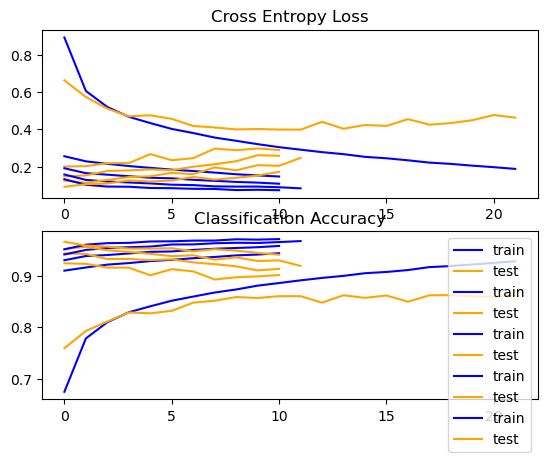

Accuracy: mean=88.745 std=0.396, n=5


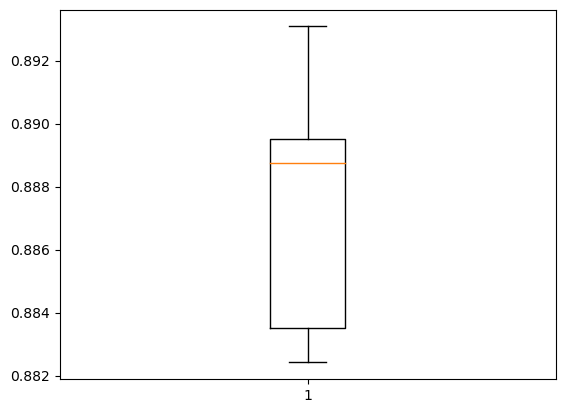

In [39]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU

def model_relu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return fashion_model

run_test_harness(model_relu(),X_train, y_train)





### Trying out tanh

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

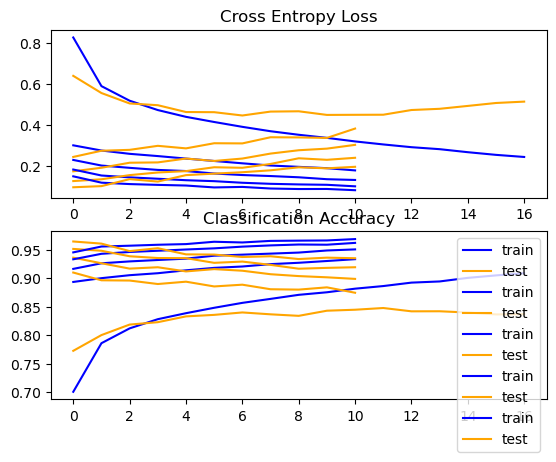

Accuracy: mean=87.440 std=0.107, n=5


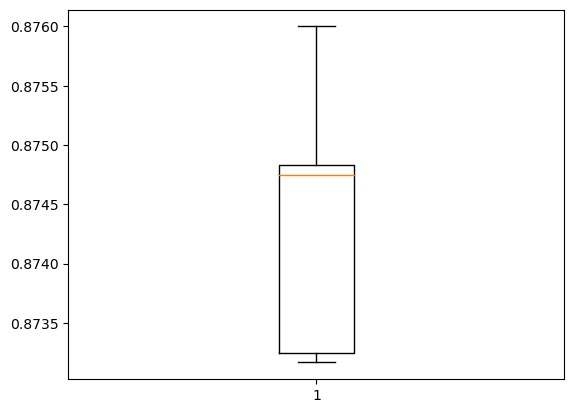

In [40]:

def model_tanh():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='tanh'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='tanh'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='linear'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_tanh(),X_train, y_train)

### Trying Out LeakyRelu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

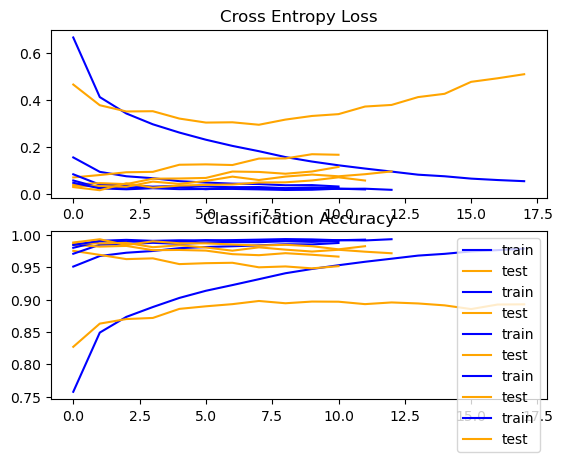

Accuracy: mean=91.895 std=0.184, n=5


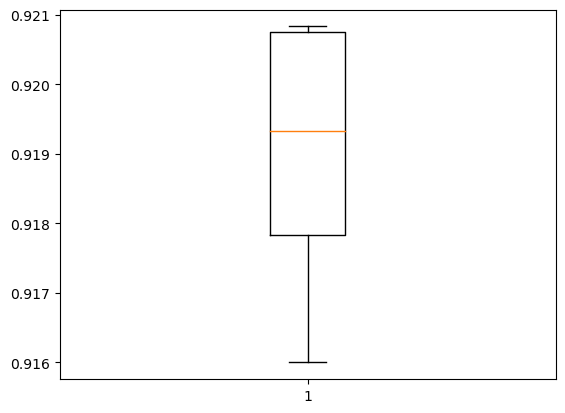

In [41]:

from keras.layers import LeakyReLU
# fix random seed for reproducibility
def model_leaky_relu():
    seed = 1
    np.random.seed(seed)
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))
    fashion_model.add(MaxPooling2D((2, 2),padding='same'))
    fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))                  
    fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='linear'))
    fashion_model.add(LeakyReLU(alpha=0.1))                  
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_leaky_relu(),X_train, y_train)

### Selu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

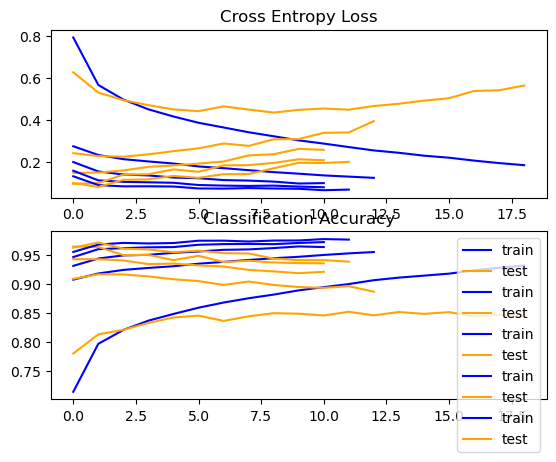

Accuracy: mean=87.842 std=0.396, n=5


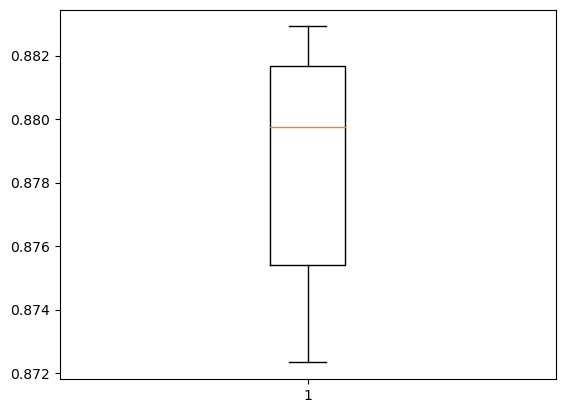

In [42]:
def model_selu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='selu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='selu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='selu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='selu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_selu(),X_train, y_train)


### elu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

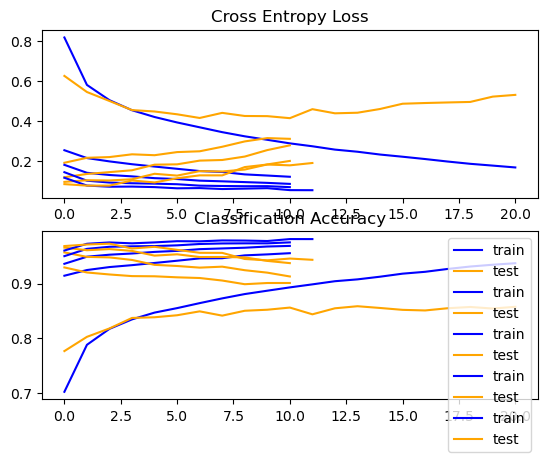

Accuracy: mean=88.125 std=0.415, n=5


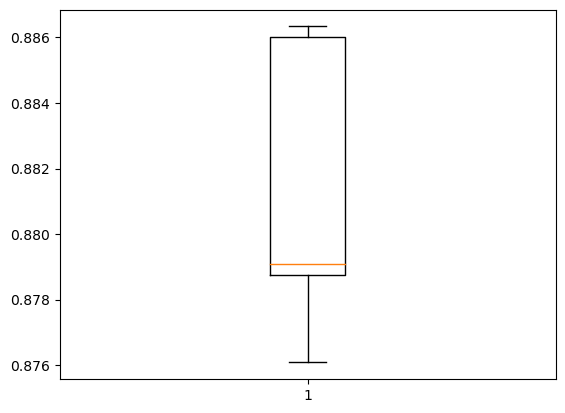

In [43]:
def model_elu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='elu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='elu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='elu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='elu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_elu(),X_train, y_train)


# Adding dropout
## Explanation on dropout and why it works
<p>Dropout is randomly removing neurons in a layer but when predicting neurons is added back in. How can something random help in AI we may wonder...</p>

![](./images/dropout.png)
<p>In the picture above,if a bad node is blocked it helps the training process. However if a good node is blocked , the neural network can still learn from a separate representation of the data though not the best but its still fine </p>


> As our accuracy goes above 90 percent , we may tend to overfit and here we will try drop out to see if it can regularize and perhaps even improve validation scores

In [44]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D((2, 2)))
fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

fashion_model.fit(X_train, y_train, batch_size=32,epochs=100,verbose=1,validation_data=(X_test, y_test))
test_loss, test_acc = fashion_model.evaluate(X_test, y_test)

# Dataframe to keep track of all model scores
precision,recall,f1 = get_metrics(fashion_model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu adam w dropout',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

> Adding drop out does improve performance but worked well with batch normalization especially for deeper networks

# Trying out different optimizers
- SGD: Performs gradient descent by picking 1 obversation out but also can do in batches and update weights. Has momentum and decay rate 
- adagrad : adaptive gradient , decreasing learning rate for frequent updates to parameter and bigger steps for rare occurance ( has vanishing gradient problem)
- adadelta:  similar to adagrad but has a window history of past gradients to adapt its learning rate instead of looking at the whole history.
- RMSprop: similar to adadelta but uses root mean square to normalize and balance momentum avoid exploding or vanishing gradient
- adam(adaptive movement): mix of Adagrad(updates learning rate) and RMSprop for scaling/normalizing gradient avoiding exploding or vanishing gradient
- adamax: very similar to adam but considers the infinite norm/ max of past gradient

![](./images/Optimizers.gif)

## Stochastic Gradient Descent (SGD)
> Instead of computing the gradients over the entire dataset, it performs a parameter update for each example in the dataset.The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.This fluctuation can be an advantage with respect to batch gradient descent because it allows the function to jump to better local minima, but at the same time it can represent a disadvantage with respect to the convergence in a specific local minima.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

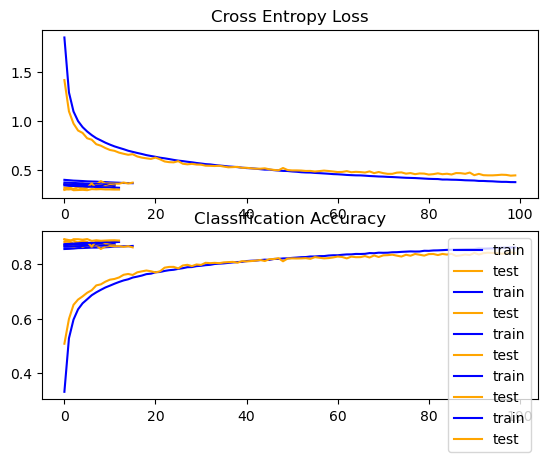

Accuracy: mean=88.188 std=0.359, n=5


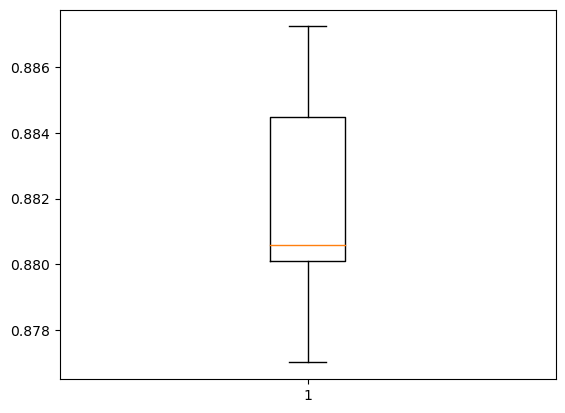

In [45]:
def model_sgd():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_sgd(),X_train, y_train)


## Adagrad
>It adapts the learning rate to the parameters performing small updates for frequently occurring features and large updates for the rarest ones.In this way, the network is able to capture information belonging to features that are not frequent, putting them in evidence and giving them the right weight.The problem of Adagrad is that it adjusts the learning rate for each parameter according to all the past gradients. So, the possibility of having a very small learning rate after a high number of steps — resulting from the accumulation of all the past gradients — is relevant.If the learning rate is too much small, we simply can’t update weights and the consequence is that the network doesn’t learn anymore.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

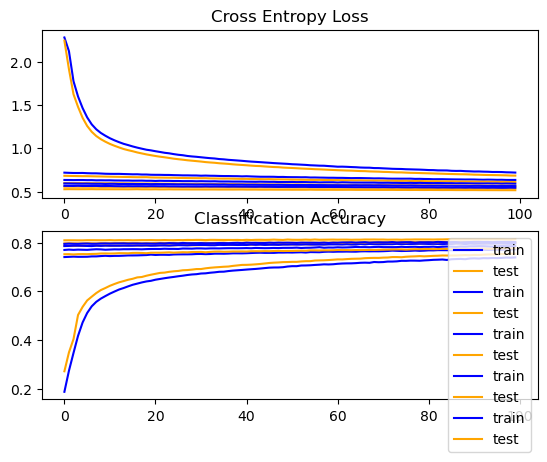

Accuracy: mean=83.548 std=1.792, n=5


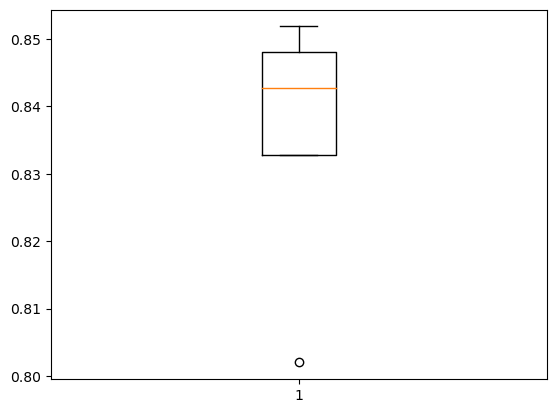

In [46]:
def model_adagrad():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_adagrad(),X_train, y_train)

## Adadelta
> It improves the previous algorithm by introducing a history window which sets a fixed number of past gradients to take in consideration during the training.In this way, we don’t have the problem of the vanishing learning rate.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

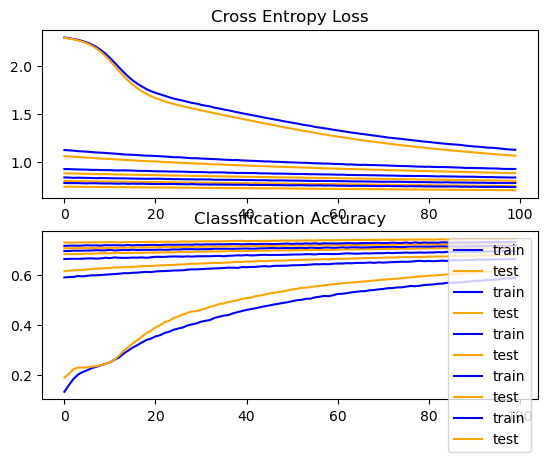

Accuracy: mean=76.838 std=2.728, n=5


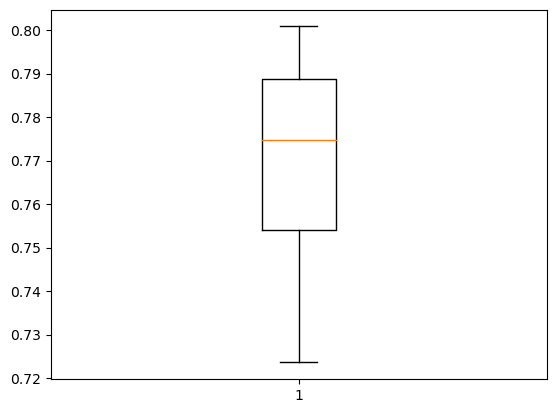

In [47]:
def model_adadelta():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model


run_test_harness(model_adadelta(),X_train, y_train)

## RMSprop (Root Mean Square Propagation)
>It is very similar to Adadelta. The only difference is in the way they manage the past gradients and also the learning rate is different for each weight

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

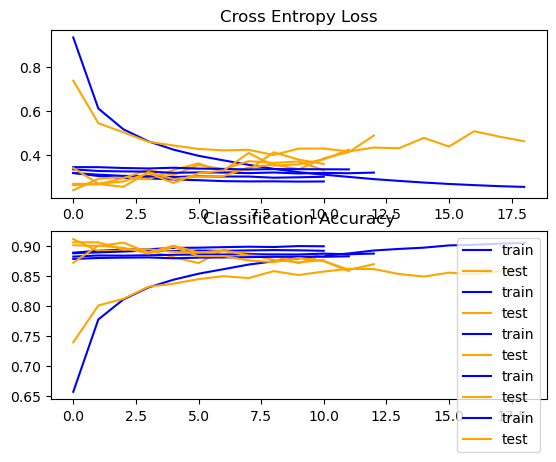

Accuracy: mean=88.273 std=1.336, n=5


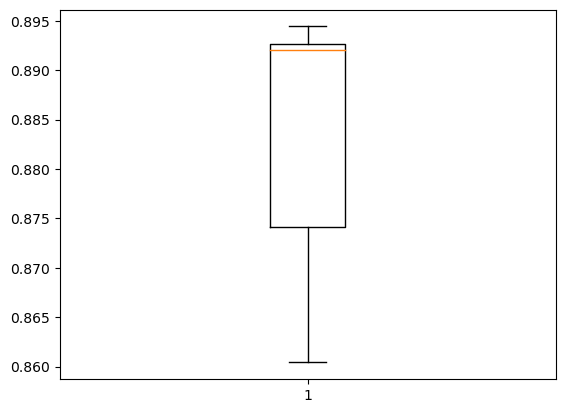

In [48]:
def model_rmsprop():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_rmsprop(),X_train, y_train)

## Adam
>It adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

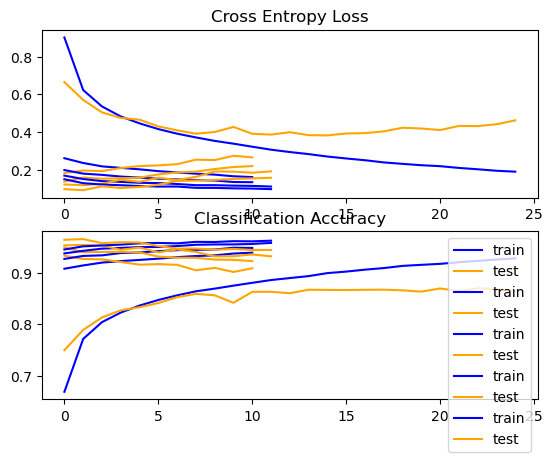

Accuracy: mean=89.215 std=0.368, n=5


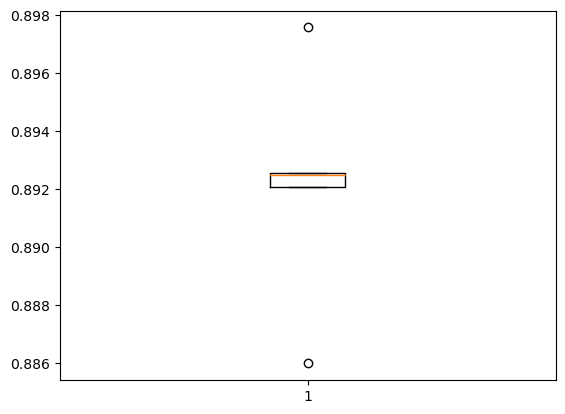

In [49]:
def model_adam():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_adam(),X_train, y_train)


## Conclusion 


## Some activations work better with certain optimizers lets find out
- set batch size to 128 
- epochs to 100 
- added reduce learning rate on plateau
> reduced learning rate on plateau is added and batch size is increased to hasten the compute time and also more epochs with early stopping to see performance of models.

![](./images/reducelrplateau.png)

> reducing learning rate as val_loss plateaus allows optimizer to more efficiently find minimum in loss surface

In [50]:
from keras.callbacks import ReduceLROnPlateau
### function for looping through all the models
def tune_model_act_opt(act,opt):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=act,
                    kernel_initializer='he_normal',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))  
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
    return model


    

In [51]:
# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    # ran into memory leakage problem trying to fix with this
    gc.collect()
    tf.keras.backend.clear_session()
    del model
    print('Test Accuracy>  %.3f' % (test_acc * 100.0))
    print('Test Loss>  %.3f' % (test_loss * 100.0))
    summarize_diagnostics(history,act,opt)
    return (test_acc*100, test_loss*100)

Test Accuracy>  91.190
Test Loss>  24.961


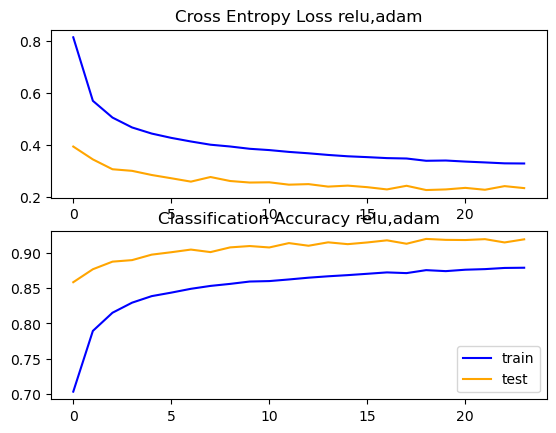

Test Accuracy>  88.870
Test Loss>  29.584


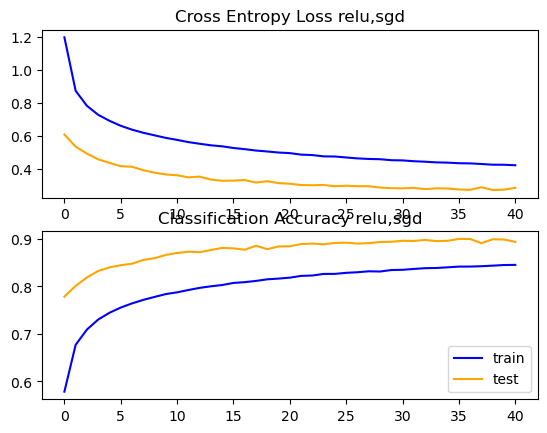

Test Accuracy>  90.960
Test Loss>  24.882


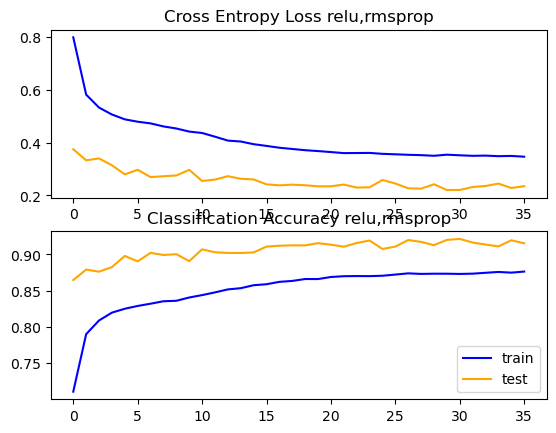

Test Accuracy>  85.540
Test Loss>  39.347


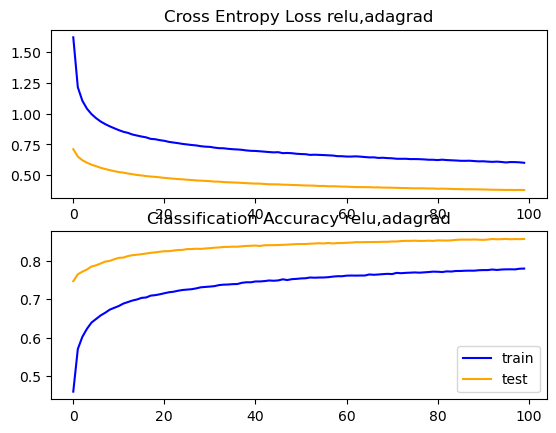

Test Accuracy>  78.870
Test Loss>  57.420


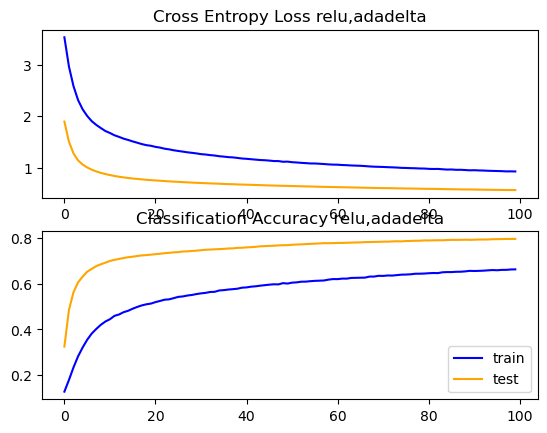

Test Accuracy>  91.390
Test Loss>  23.578


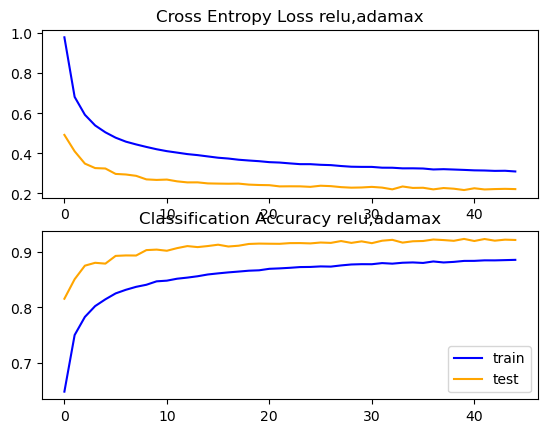

Test Accuracy>  90.880
Test Loss>  25.075


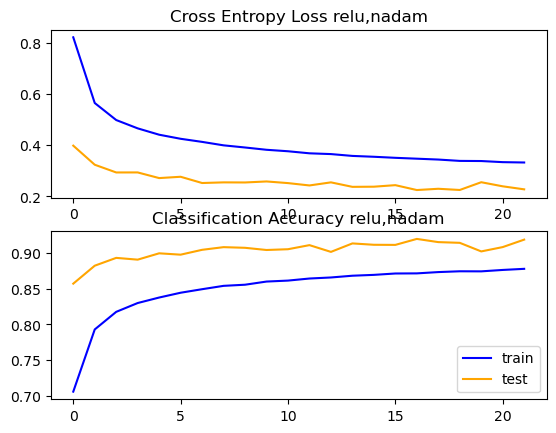

Test Accuracy>  88.640
Test Loss>  29.074


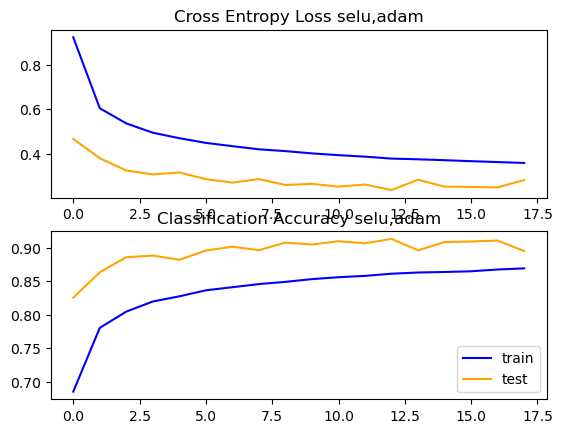

Test Accuracy>  86.240
Test Loss>  36.556


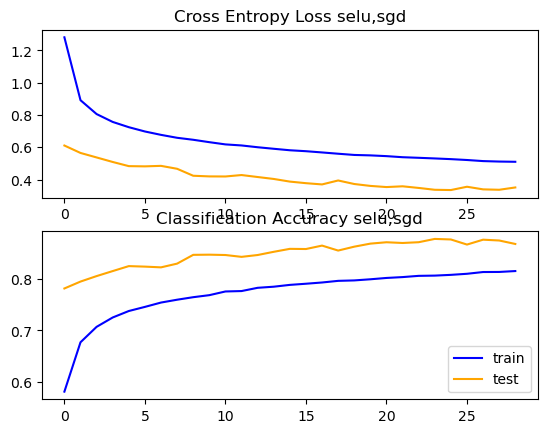

Test Accuracy>  90.050
Test Loss>  28.412


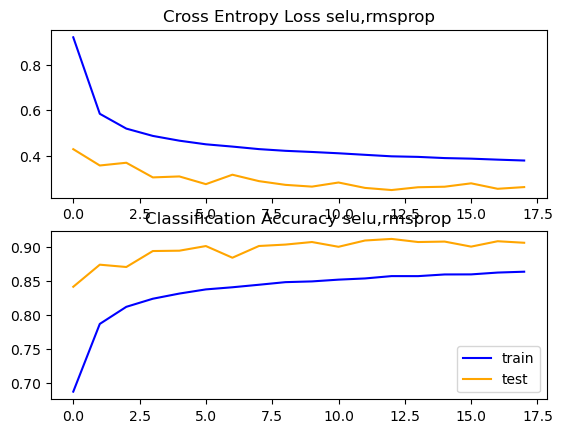

Test Accuracy>  82.340
Test Loss>  47.414


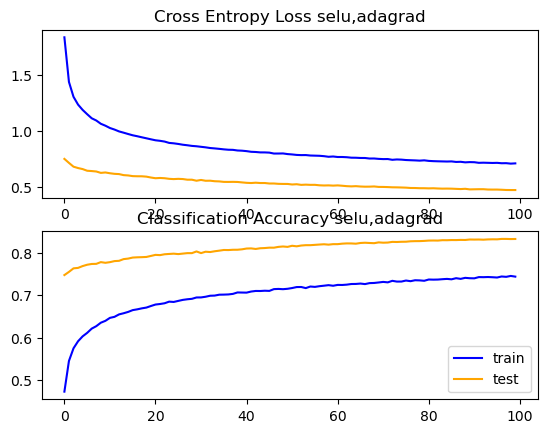

Test Accuracy>  75.720
Test Loss>  67.493


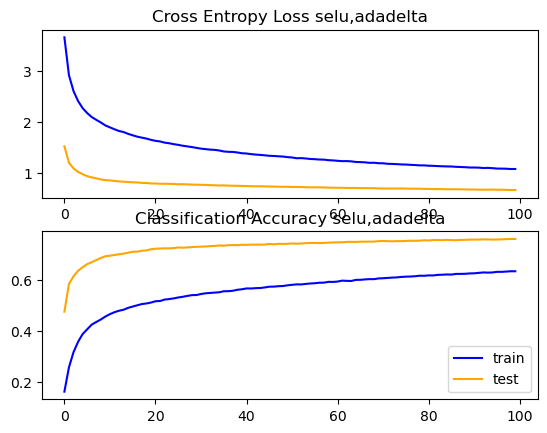

Test Accuracy>  91.700
Test Loss>  23.207


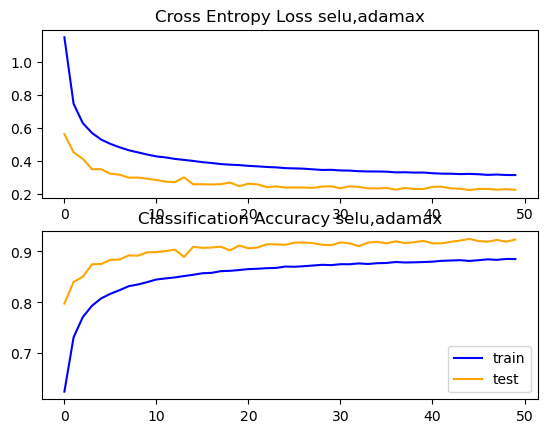

Test Accuracy>  90.840
Test Loss>  25.507


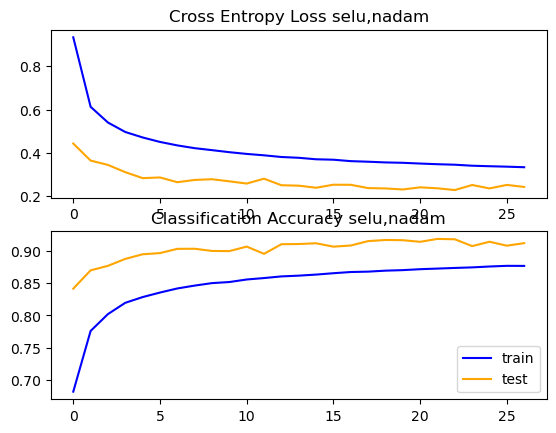

Test Accuracy>  90.080
Test Loss>  26.995


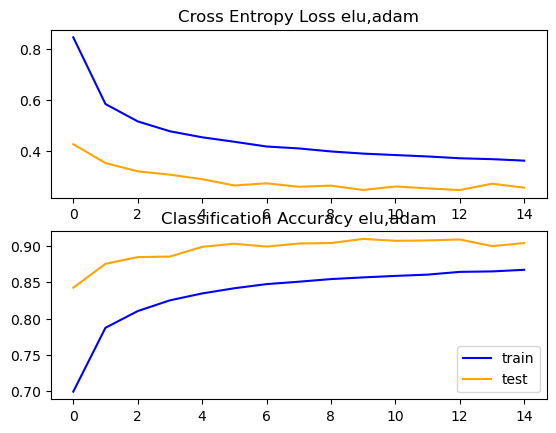

Test Accuracy>  89.690
Test Loss>  28.244


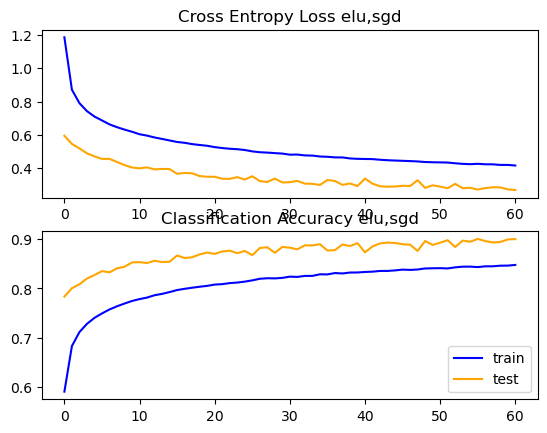

Test Accuracy>  89.420
Test Loss>  30.106


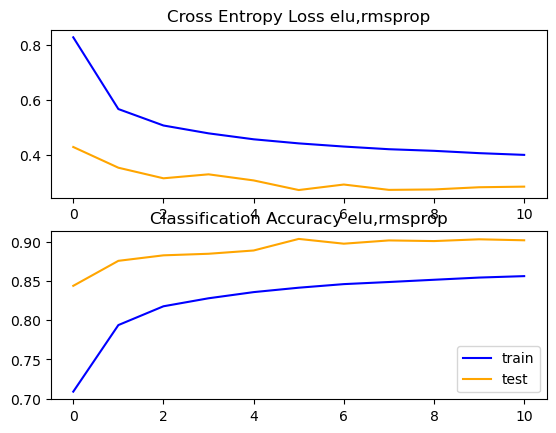

Test Accuracy>  81.050
Test Loss>  52.059


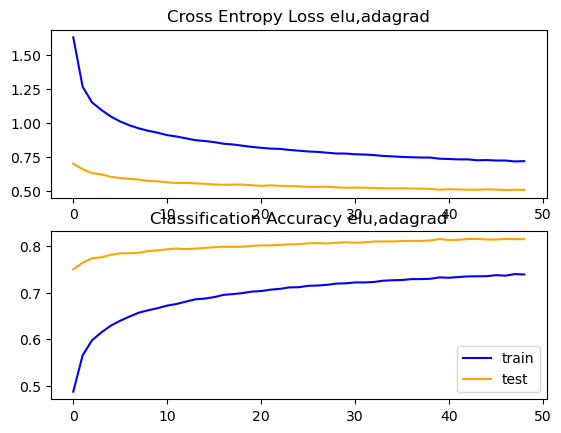

Test Accuracy>  77.410
Test Loss>  59.613


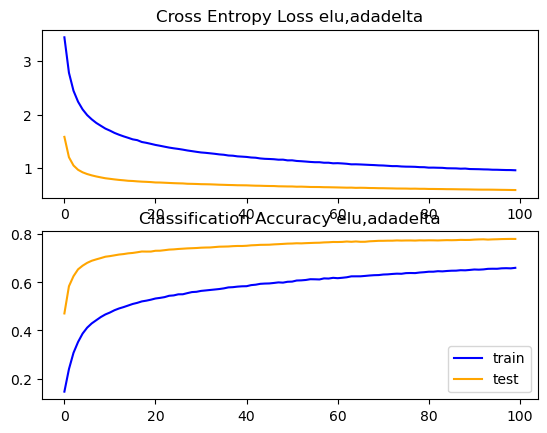

Test Accuracy>  89.730
Test Loss>  27.585


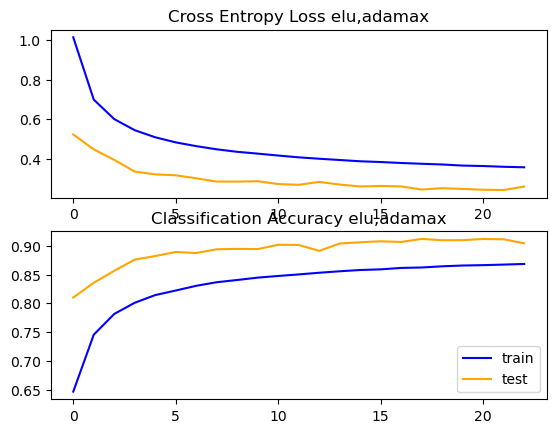

Test Accuracy>  90.580
Test Loss>  25.781


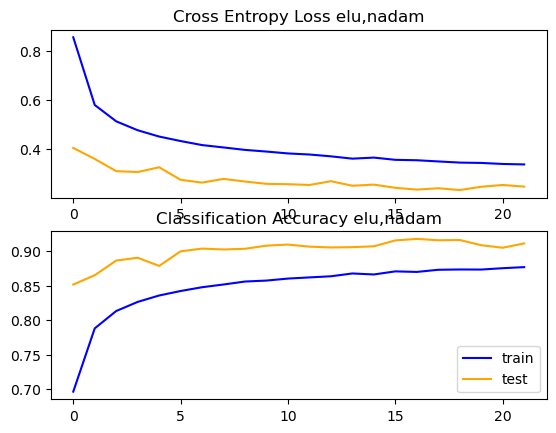

Test Accuracy>  89.460
Test Loss>  29.669


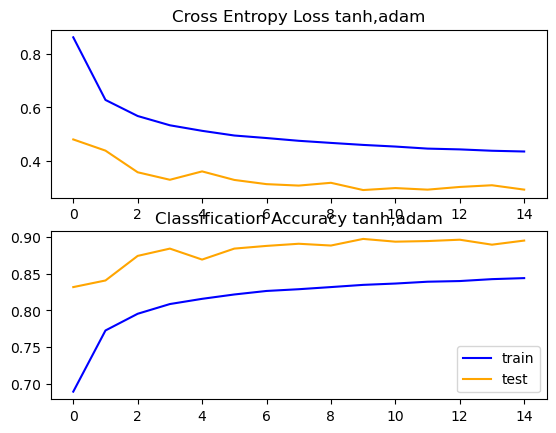

Test Accuracy>  88.730
Test Loss>  32.200


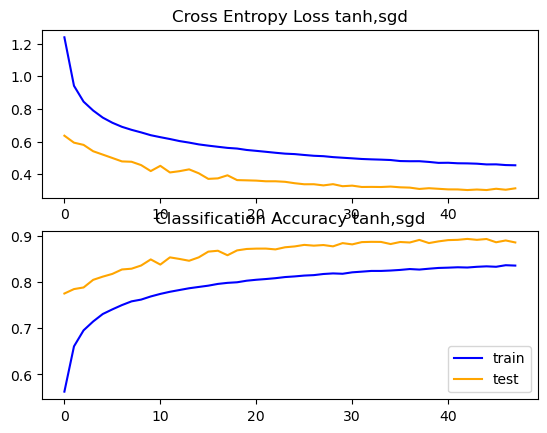

Test Accuracy>  88.300
Test Loss>  33.553


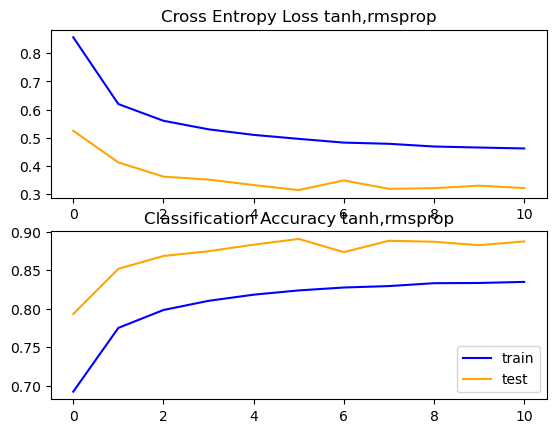

Test Accuracy>  82.810
Test Loss>  47.884


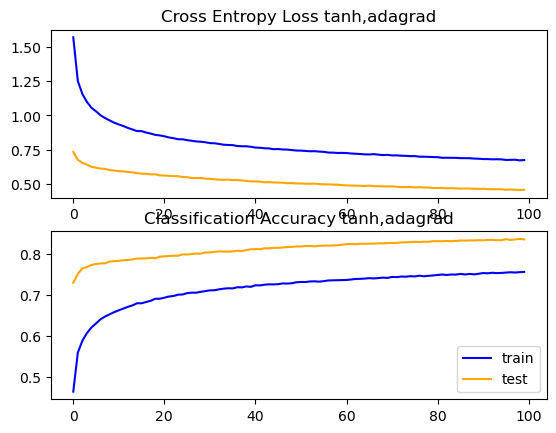

Test Accuracy>  76.690
Test Loss>  64.386


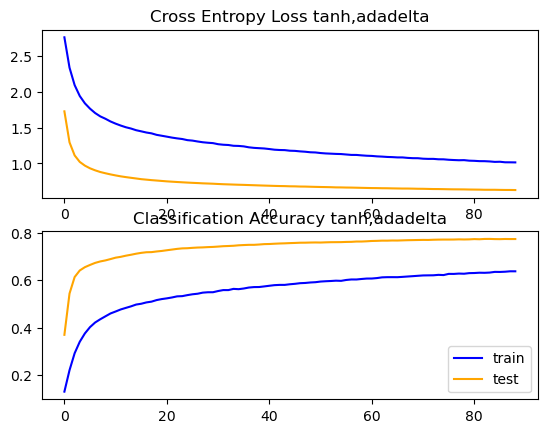

Test Accuracy>  90.900
Test Loss>  25.595


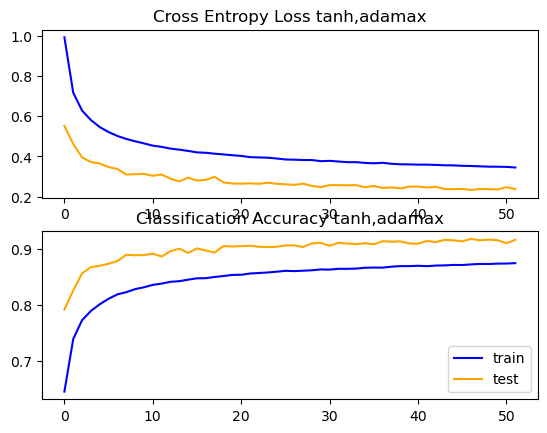

Test Accuracy>  89.330
Test Loss>  29.901


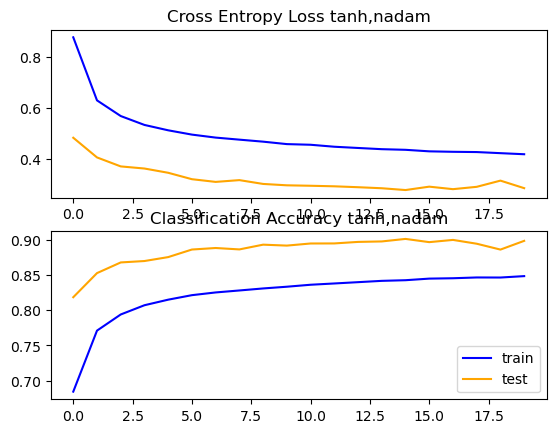

Test Accuracy>  88.930
Test Loss>  29.090


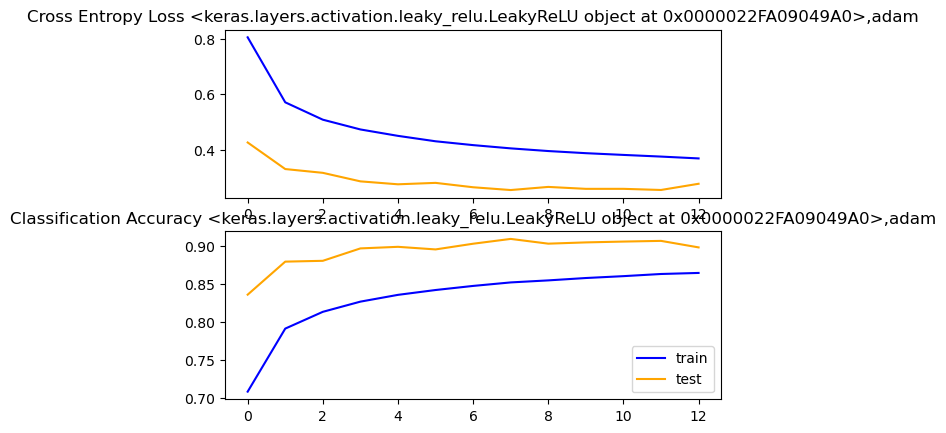

Test Accuracy>  87.190
Test Loss>  35.392


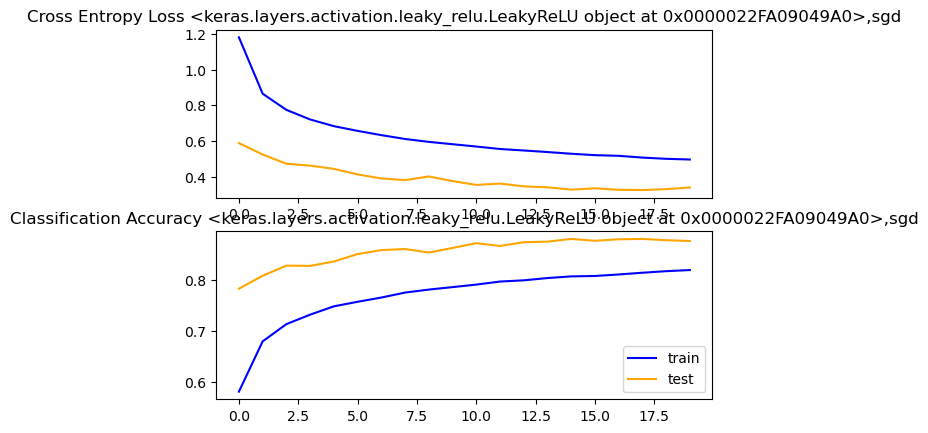

Test Accuracy>  91.210
Test Loss>  24.428


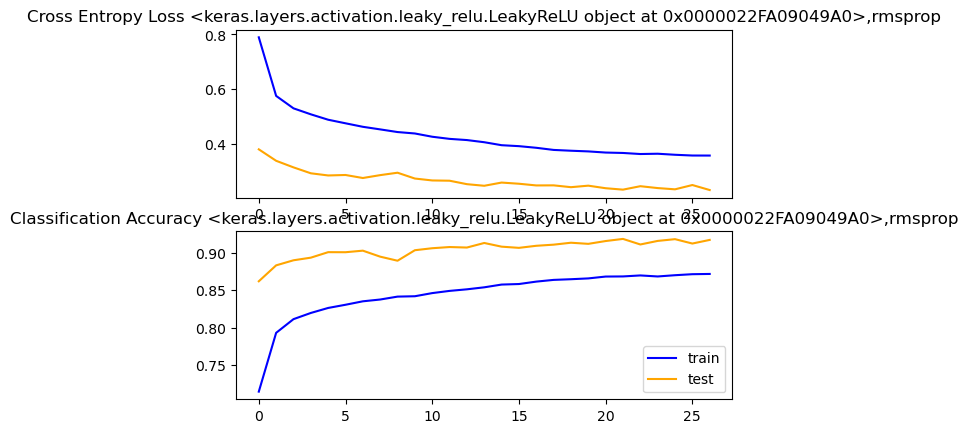

Test Accuracy>  84.340
Test Loss>  41.377


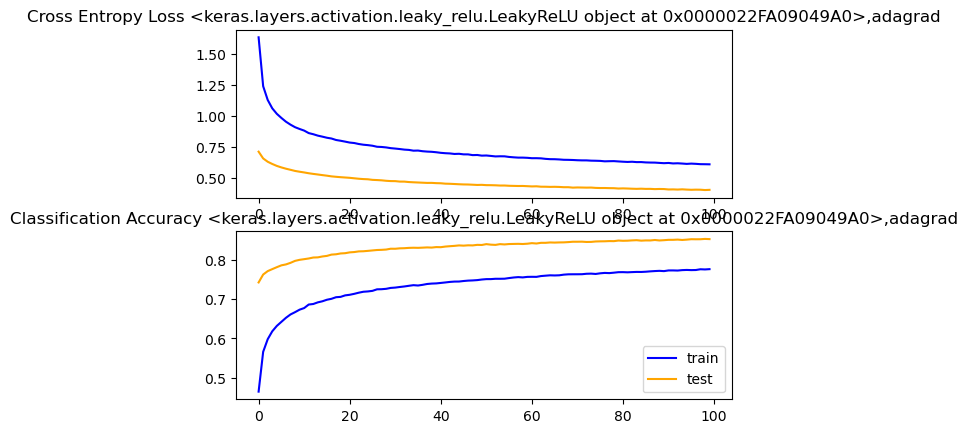

Test Accuracy>  79.050
Test Loss>  58.410


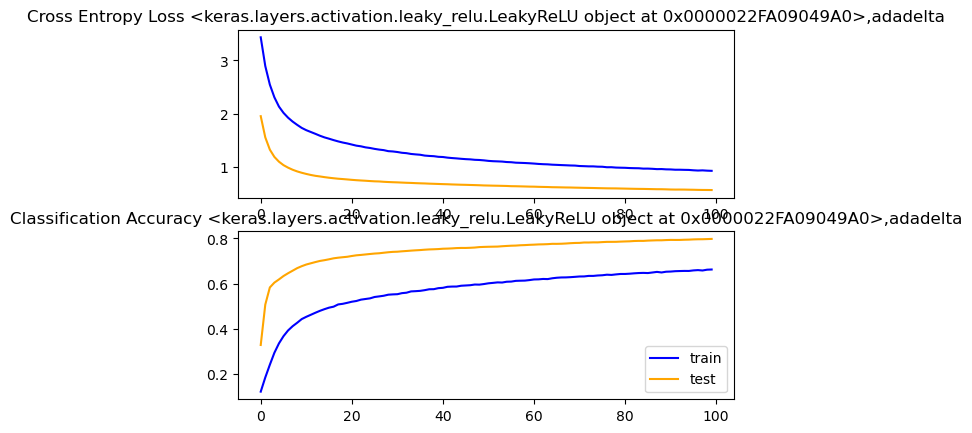

Test Accuracy>  91.840
Test Loss>  22.694


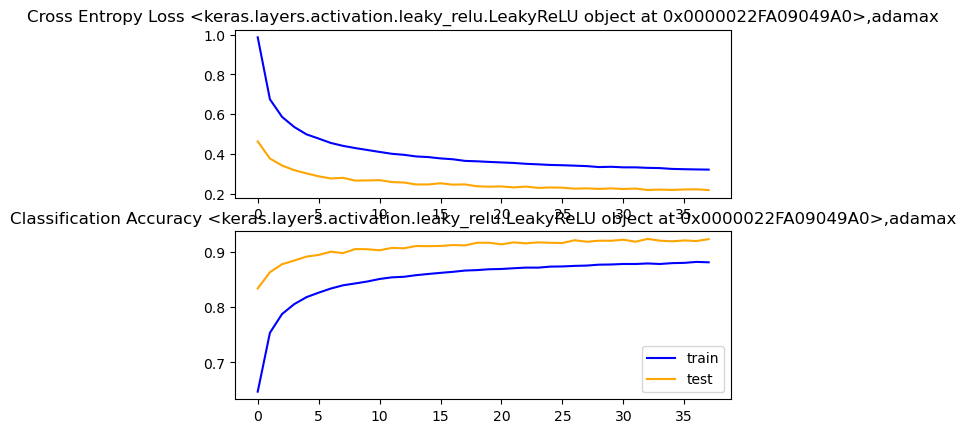

Test Accuracy>  91.790
Test Loss>  22.800


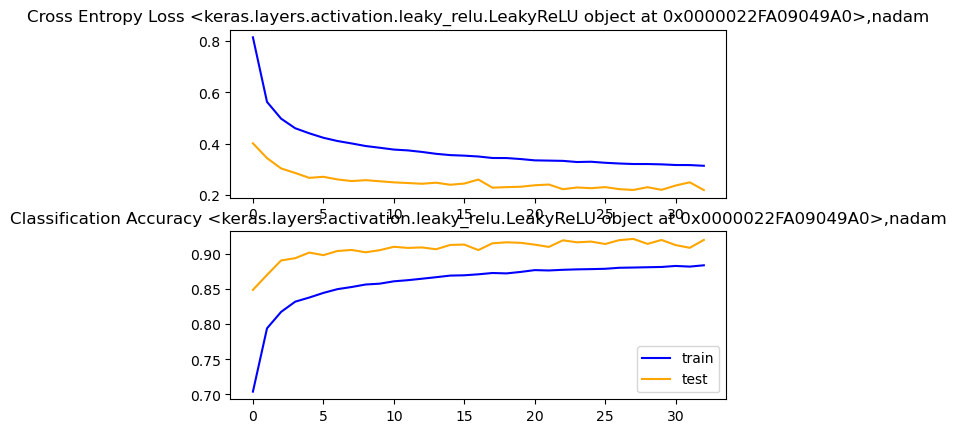

In [52]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',keras.layers.LeakyReLU(alpha=0.01)]
accuracy_act_opt = list()
loss_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc,loss = run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    accuracy_act_opt.append(acc)
    loss_act_opt.append(loss)
    



### best optimizer and activation pair

In [53]:
import pandas as pd
# create a dataframe of scores_act_opt and act_opt
df_act_opt = pd.DataFrame({'act_opt':act_opt,'accuracy':accuracy_act_opt,'loss':loss_act_opt})
# highlight highest score_act_opt in df_act_opt
df_act_opt.style.highlight_max(subset=['accuracy'],color='green', axis=0).highlight_min(subset=['loss'],color='green', axis=0)

# style only score_act_opt in df_act_opt

# Introducing regularization
![](./images/good_over.png)
> Graph 1. Model with a good fit and high variance. Source: https://www.researchgate.net/publication/332412613
<p>We would like a good fit instead as sometimes there are noisy data that will prevent us from generalizing well, preventing the model from predicting well on real world data</p>


## l1 regularization 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

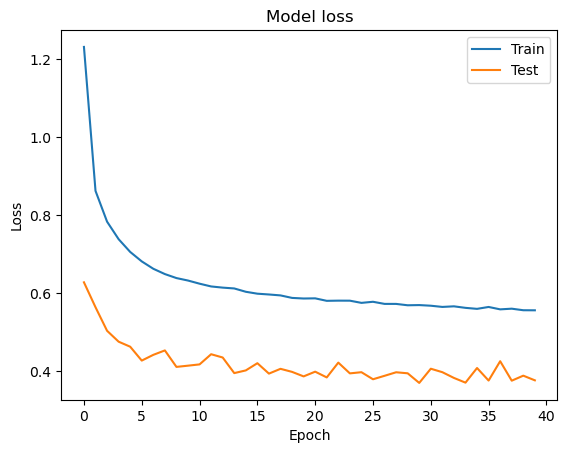

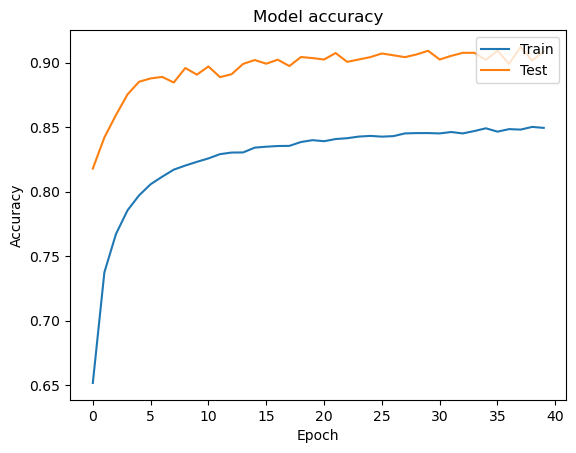

In [54]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr] ,verbose=2)
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L2 regularization

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

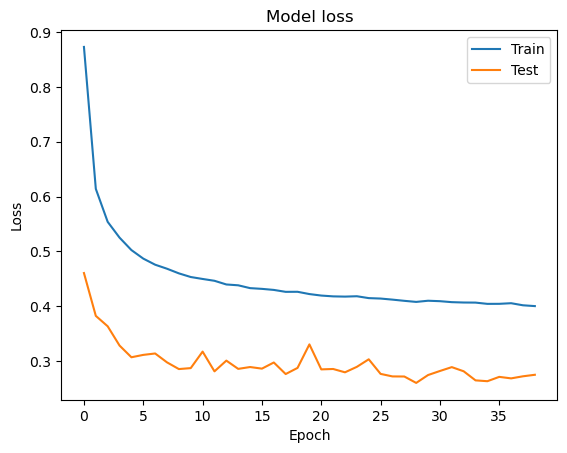

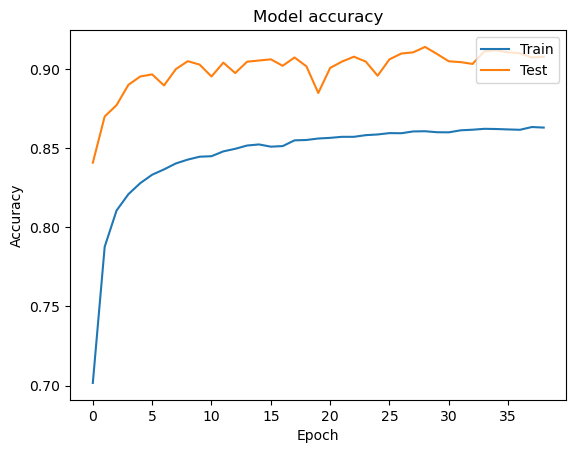

In [55]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L1L2 regularization

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 64)         

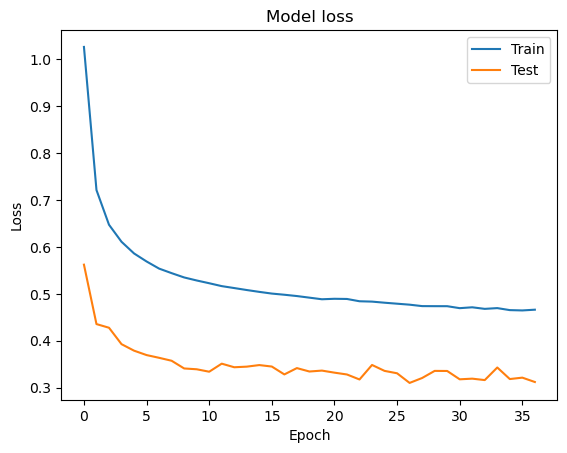

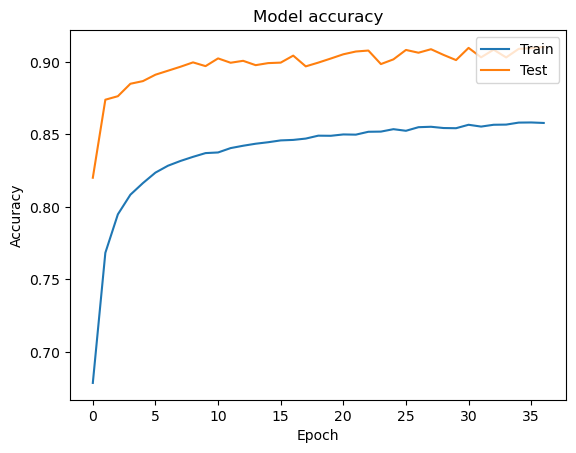

In [56]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])


# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Conv 2d by machine learning mastery
![](./images/convolutionalNN.png)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               540900    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

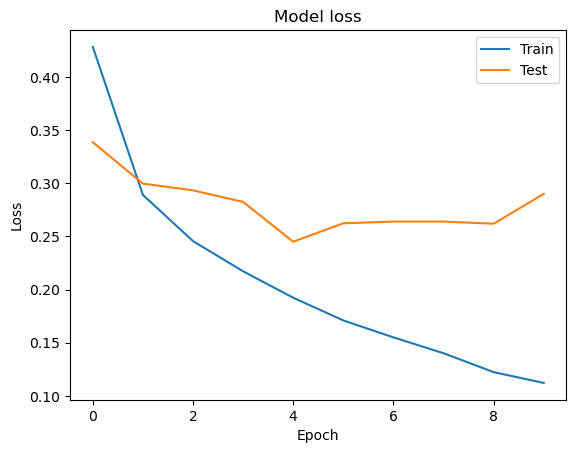

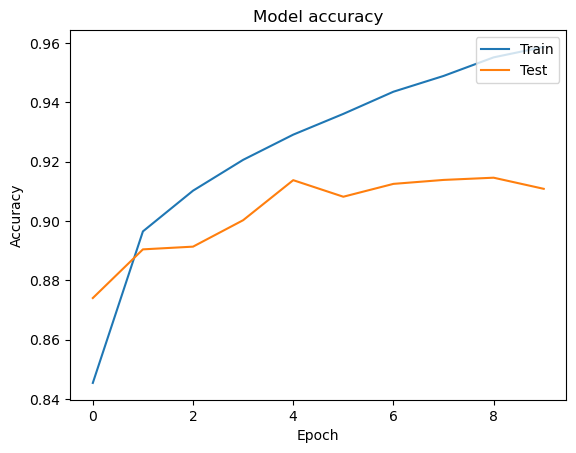

313/313 [==============================] - 0s 1ms/step


NameError: name 'recall_score' is not defined

In [27]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.summary()

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


precision,recall,f1 = get_metrics(model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Machine Learning Mastery model',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)








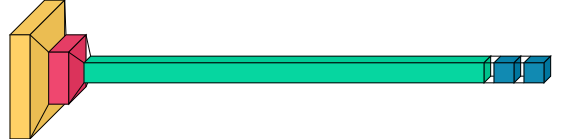

In [28]:
visualkeras.layered_view(model)

# How well does it perform on validation?

313/313 [==============================] - 0s 1ms/step


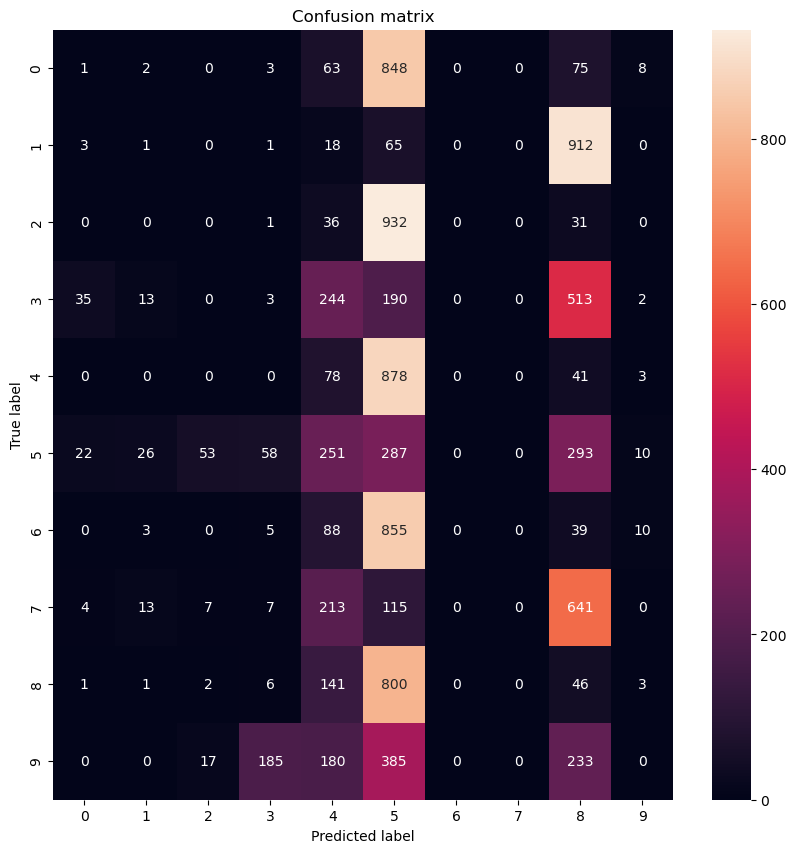

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
classifation_matrix = confusion_matrix(y_test_labels, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

gc.collect()
tf.keras.backend.clear_session()
del model


# Final Model
>  I will be attempting to defeat Machine Learning Mastery model after learning the various features of CNNs

## Increasing filters architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          5

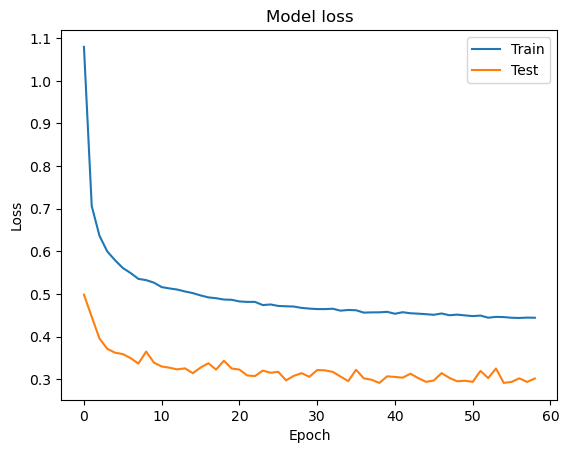

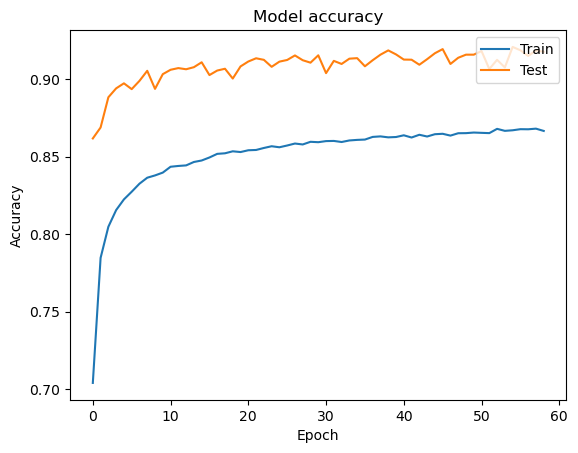

Train: 0.915, Test: 0.914
313/313 [==============================] - 1s 2ms/step


In [59]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
final_model = Sequential()
final_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',kernel_initializer='he_normal',input_shape=(28,28,1)))
final_model.add(LeakyReLU(alpha=0.1))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.25))
final_model.add(Conv2D(64, (5, 5), activation='linear'))
final_model.add(LeakyReLU(alpha=0.1))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(3, 3)))
final_model.add(Dropout(0.25))
final_model.add(Conv2D(128, (3, 3), activation='linear'))
final_model.add(LeakyReLU(alpha=0.1))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.4))
final_model.add(Flatten())
final_model.add(Dense(128, activation='linear'))
final_model.add(LeakyReLU(alpha=0.1))
final_model.add(Dropout(0.3))
final_model.add(Flatten())
final_model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(0.01)))

final_model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])
final_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = final_model.fit(X_train, y_train, epochs = 200,
                validation_data=(X_val, y_val), callbacks=[early_stopping,mc,reduce_lr] , batch_size=64)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


precision,recall,f1 = get_metrics(saved_model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Fan in final model',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)



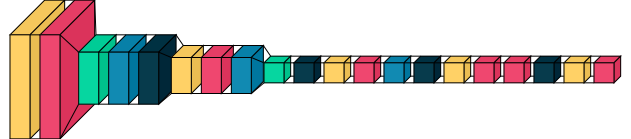

In [60]:
import visualkeras
visualkeras.layered_view(saved_model)

313/313 [==============================] - 1s 2ms/step


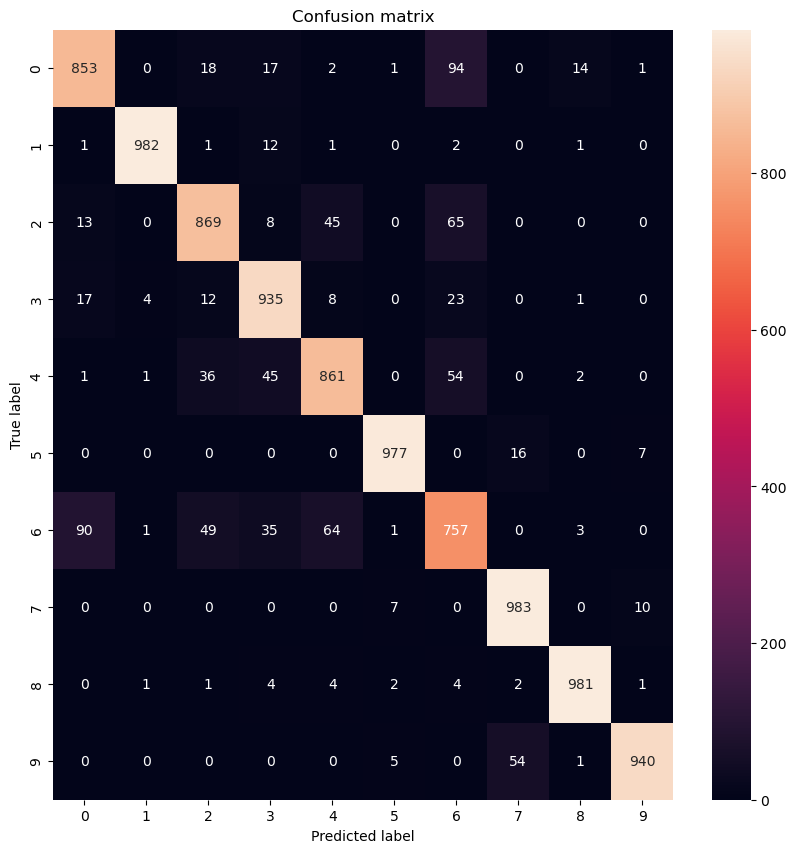

In [61]:

pred = saved_model.predict(X_test)
pred = np.argmax(pred, axis=1)
classifation_matrix = confusion_matrix(y_test_label, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Decreasing filters architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)         

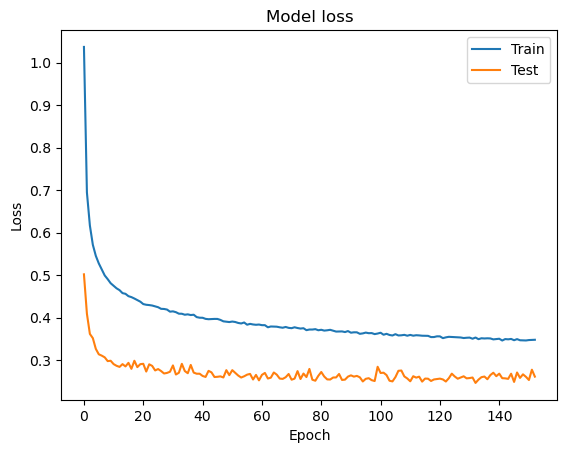

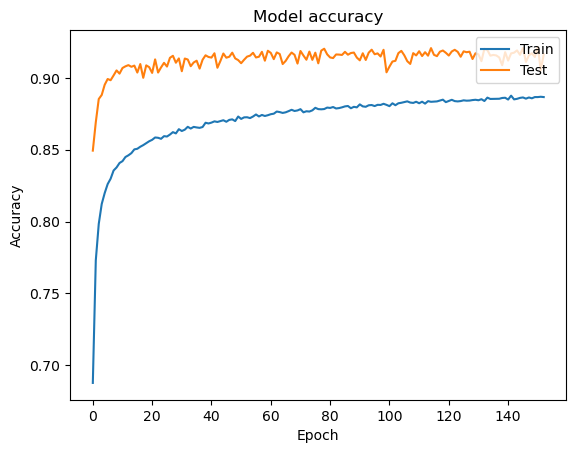

Train: 0.938, Test: 0.916
313/313 [==============================] - 1s 2ms/step


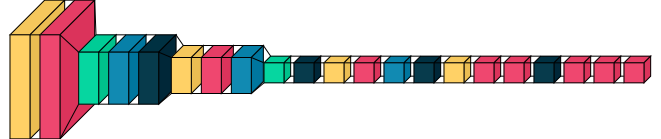

In [62]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
final_model2 = Sequential()
final_model2.add(Conv2D(128, kernel_size=(3, 3),activation='linear',kernel_initializer='he_normal',input_shape=(28,28,1)))
final_model2.add(LeakyReLU(alpha=0.1))
final_model2.add(BatchNormalization())
final_model2.add(Dropout(0.25))
final_model2.add(Conv2D(64, (5, 5), activation='linear'))
final_model2.add(LeakyReLU(alpha=0.1))
final_model2.add(BatchNormalization())
final_model2.add(MaxPooling2D(pool_size=(3, 3)))
final_model2.add(Dropout(0.25))
final_model2.add(Conv2D(32, (3, 3), activation='linear'))
final_model2.add(LeakyReLU(alpha=0.1))
final_model2.add(BatchNormalization())
final_model2.add(Dropout(0.4))
final_model2.add(Flatten())
final_model2.add(Dense(128, activation='linear'))
final_model2.add(LeakyReLU(alpha=0.1))
final_model2.add(Dropout(0.3))
final_model2.add(Dense(64, activation='linear'))
final_model2.add(LeakyReLU(alpha=0.1))
final_model2.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(0.01)))

final_model2.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])
final_model2.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = ModelCheckpoint('final_fanout_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = final_model2.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,mc,reduce_lr] , batch_size=64)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

fanout_model = load_model('final_fanout_model.h5')
# evaluate the model
_, train_acc = fanout_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = fanout_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


precision,recall,f1 = get_metrics(fanout_model,X_test)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['Fan out final model',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


visualkeras.layered_view(fanout_model)





313/313 [==============================] - 1s 3ms/step


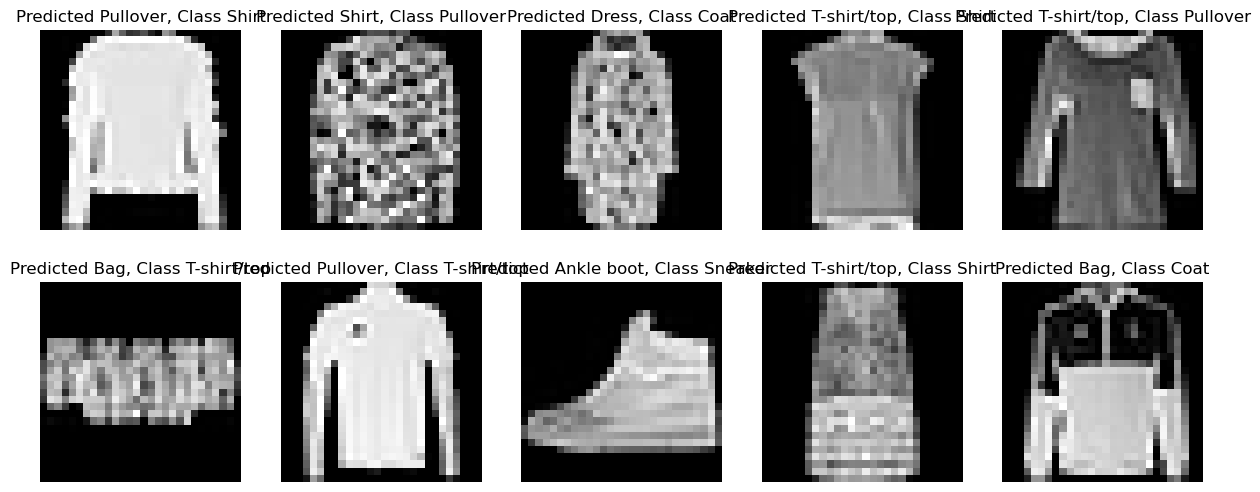

In [84]:
# plot actual and predicted images for 10 random images that were misclassified
pred = fanout_model.predict(X_test)
# get images where predictions and actual labels don't match
incorrect = np.nonzero(pred.argmax(axis=1) != y_test_labels)[0]
# select 10 random images from those where prediction and actual label don't match
incorrect = np.random.choice(incorrect, 10)
# plot 10 random images where prediction and actual label don't match
types = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i, incorrect in enumerate(incorrect):
    ax[i//5, i%5].imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    # title for each image will be actual and predicted label
    ax[i//5, i%5].set_title("Predicted {}, Class {}".format(types[pred[incorrect].argmax()], types[y_test_labels[incorrect]]))
    ax[i//5, i%5].axis('off')


## I would say the model is already performing quite well , even with the human eye it is hard to tell the difference between a shirt and a tshirt or sneaker with an ankle boot so I would say the model is doing a good job

313/313 [==============================] - 1s 3ms/step


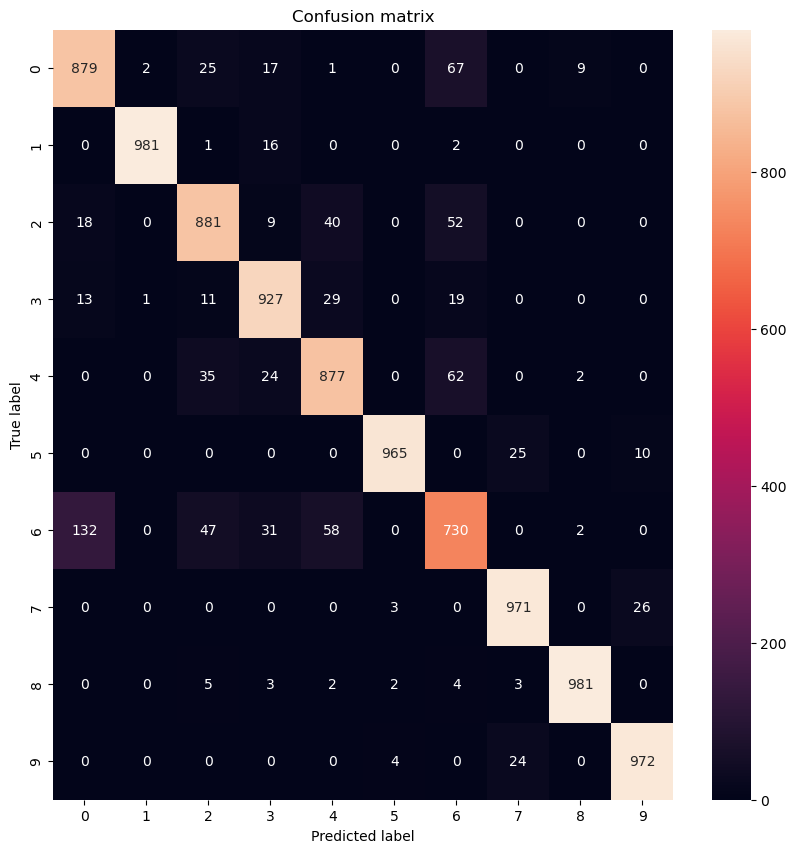

In [ ]:

pred = fanout_model.predict(X_test)
pred = np.argmax(pred, axis=1)
classifation_matrix = confusion_matrix(y_test_labels, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Conclusion for all models

In [ ]:
Model_scores

Model  Accuracy      Loss  \
0                                  Dense 1 layer NN    0.8858  0.341921   
1                                  Dense NN 2 layer    0.8728  0.349946   
2                                  Dense NN 3 layer    0.8817  0.337963   
3                             CNN linear activation    0.8286  0.499499   
4                               CNN linear max pool    0.8741  0.752744   
5                               CNN linear avg pool    0.8292  0.495260   
6                           CNN linear w batch_norm    0.8180  0.512918   
7                           Deeper CNN w batch_norm    0.9138  0.296545   
8   linear batchnorm high epochs w rotated data aug    0.8328  0.483479   
9                           CNN relu adam w dropout    0.8826  1.016854   
10                               Fan in final model    0.9138  0.308034   
11                              Fan out final model    0.9156  0.271089   
12                                      final model    0.9128  0.272664   
13                                      final model    0.9123  0.252064   
14                                      final model    0.8913  0.312229   
15                                      final model    0.9164  0.235057   

    Precision  Recall  F1 Score  
0    0.886105  0.8858  0.884840  
1    0.873548  0.8728  0.872011  
2    0.885402  0.8817  0.882247  
3    0.829234  0.8286  0.826913  
4    0.879295  0.8741  0.875376  
5    0.832411  0.8292  0.829171  
6    0.822551  0.8180  0.815895  
7    0.916027  0.9138  0.914426  
8    0.832164  0.8328  0.830817  
9    0.882927  0.8826  0.882460  
10   0.914031  0.9138  0.913710  
11   0.915156  0.9156  0.915108  
12   0.912457  0.9128  0.912383  
13   0.912073  0.9123  0.912102  
14   0.892164  0.8913  0.891617  
15   0.916172  0.9164  0.916111

- relu family activation( I chose leaky relu ) works best with adam / adamax optimizer
- Padding does not help much for this dataset but it may help for other datasets
- Batch normalization was used to speed up training and regularize the model
- Covered most of the various features of CNNs including data augmentation, pooling, batch normalization, dropout, and regularization
- Fan out architecture where the number of filters increases as we go deeper into the network worked better
- Tried decreasing learning rate as val_loss plateaus to help optimizer find minimum in loss surface
- Managed to beat machine learning mastery model 92% > 91.5%
> Overall , I think it was a good learning experience as I managed to improve and beat a model created by Machine Learning Master. I hope to learn more about CNNs and other deep learning models in the future 





# 